# $\color{blue}{\text{MADE}}$ $\bullet$ $\color{red}{\text{Advanced ML}}$ $\bullet$ HW №1
### Преподаватель: [*Сергей Николенко*](https://logic.pdmi.ras.ru/~sergey/index.html)
### Выполнил: $\text{Саит Шарипов, группа MADE-DS-22}$
### 🦠 Теорема Байеса и линейная регрессия: что делать с коронавирусом?
* * *


# 📝 [Описание задания](https://docs.google.com/document/d/1oTOU5FKyvqKIwvN_MnMrL6fj8mWDu7bbuL_t7EZGXHM/edit#):

Это задание связано с анализом конкретного датасета, в котором, надеюсь, понадобится то, чему мы с вами до сих пор научились. В качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Любые комментарии, новые идеи и рассуждения на тему в этом ноутбуке категорически приветствуются. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей 👉[ссылке](https://ourworldindata.org/coronavirus-source-data).

1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с $3$ марта $2020$ г. (в этот момент впервые стало больше $2$ заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы `total_cases` и `new_cases`); для упрощения обработки можно заменить в столбце `new_cases` все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых $50$ отсчётов (дней), начиная с $3$ марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).
2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем. 
    - **a)** Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: $y$ $\sim$ exp(линейная функция от $x$), где $x$ — номер текущего дня.
    - **b)** Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).
    - **c)** Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к $1$ мая? к $1$ июня? к $1$ сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).
3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана: $$\large{Ф(x) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^x e^{-\frac{t^2}{2}}\,dt}$$
[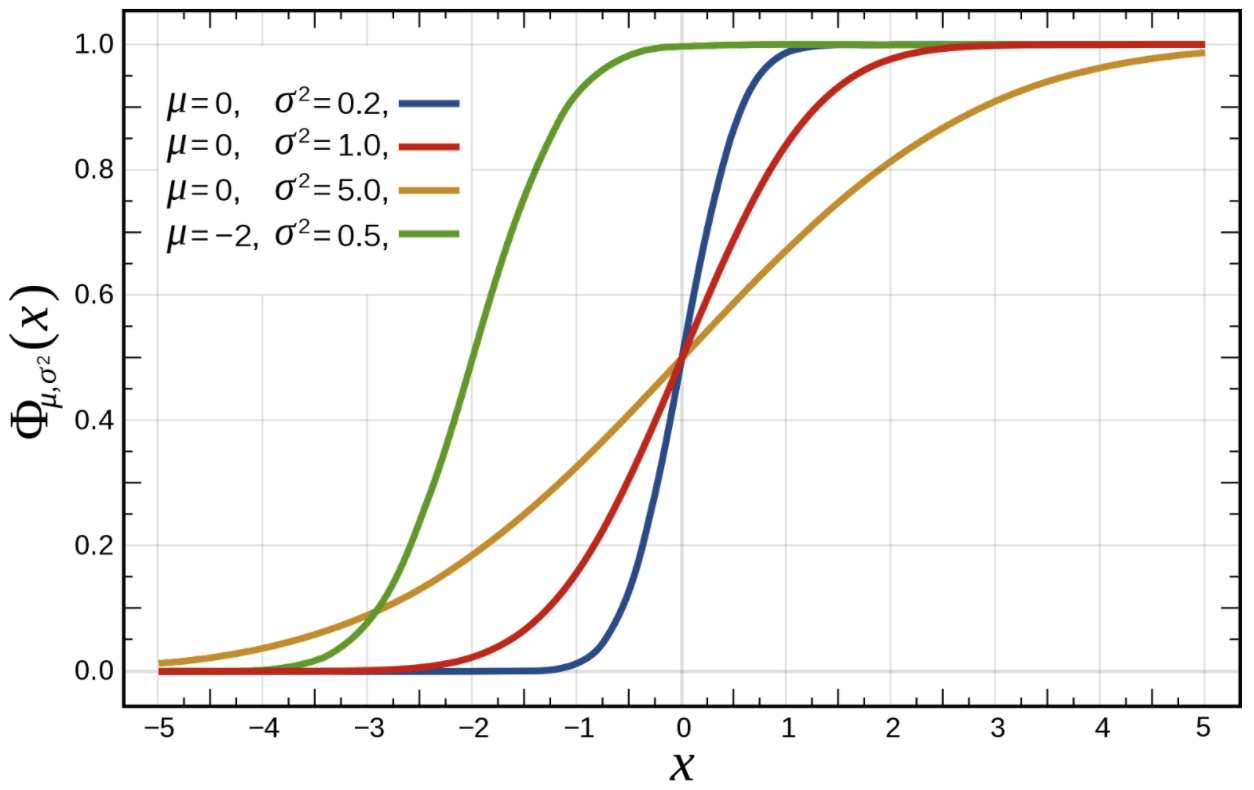](attachment:hw1_image-2.png)
Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от $t$.
    - **a)** Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.
    - **b)** Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.
    - **c)** Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии ($90$-й процентиль в выборке числа случаев)? В оптимистичном сценарии ($10$-й процентиль)?

4. 🎁 *Бонус*: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

5. \[*Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете*\]  
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?





# ✅ Решение

## 1️⃣
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с $3$ марта $2020$ г. (в этот момент впервые стало больше $2$ заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы `total_cases` и `new_cases`); для упрощения обработки можно заменить в столбце `new_cases` все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых $50$ отсчётов (дней), начиная с $3$ марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from datetime import datetime, timedelta

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15, 8)
legend_fontsize = 18
axis_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rc('axes', **{'titlesize': '16', 'labelsize': '16'})
rc('legend', **{'fontsize': '16'})
rc('figure', **{'dpi' : 300})

In [2]:
df = pd.read_csv('owid-covid-data.csv', delimiter=',', date_parser='date')
df['date'] = pd.to_datetime(df['date'])
df = df[(df.location == 'Russia') & (df.date >= '2020-03-03')]
df = df.replace({'new_cases' : {0.0 : 1.0}})

date_of_separation = df.iloc[0].date + pd.Timedelta("50 day")

df['day'] = np.arange(1, df.shape[0] + 1)

train = df[df.date < date_of_separation]
test = df[df.date >= date_of_separation]

print(train.shape)
print(test.shape)

(50, 68)
(659, 68)


## 2️⃣
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

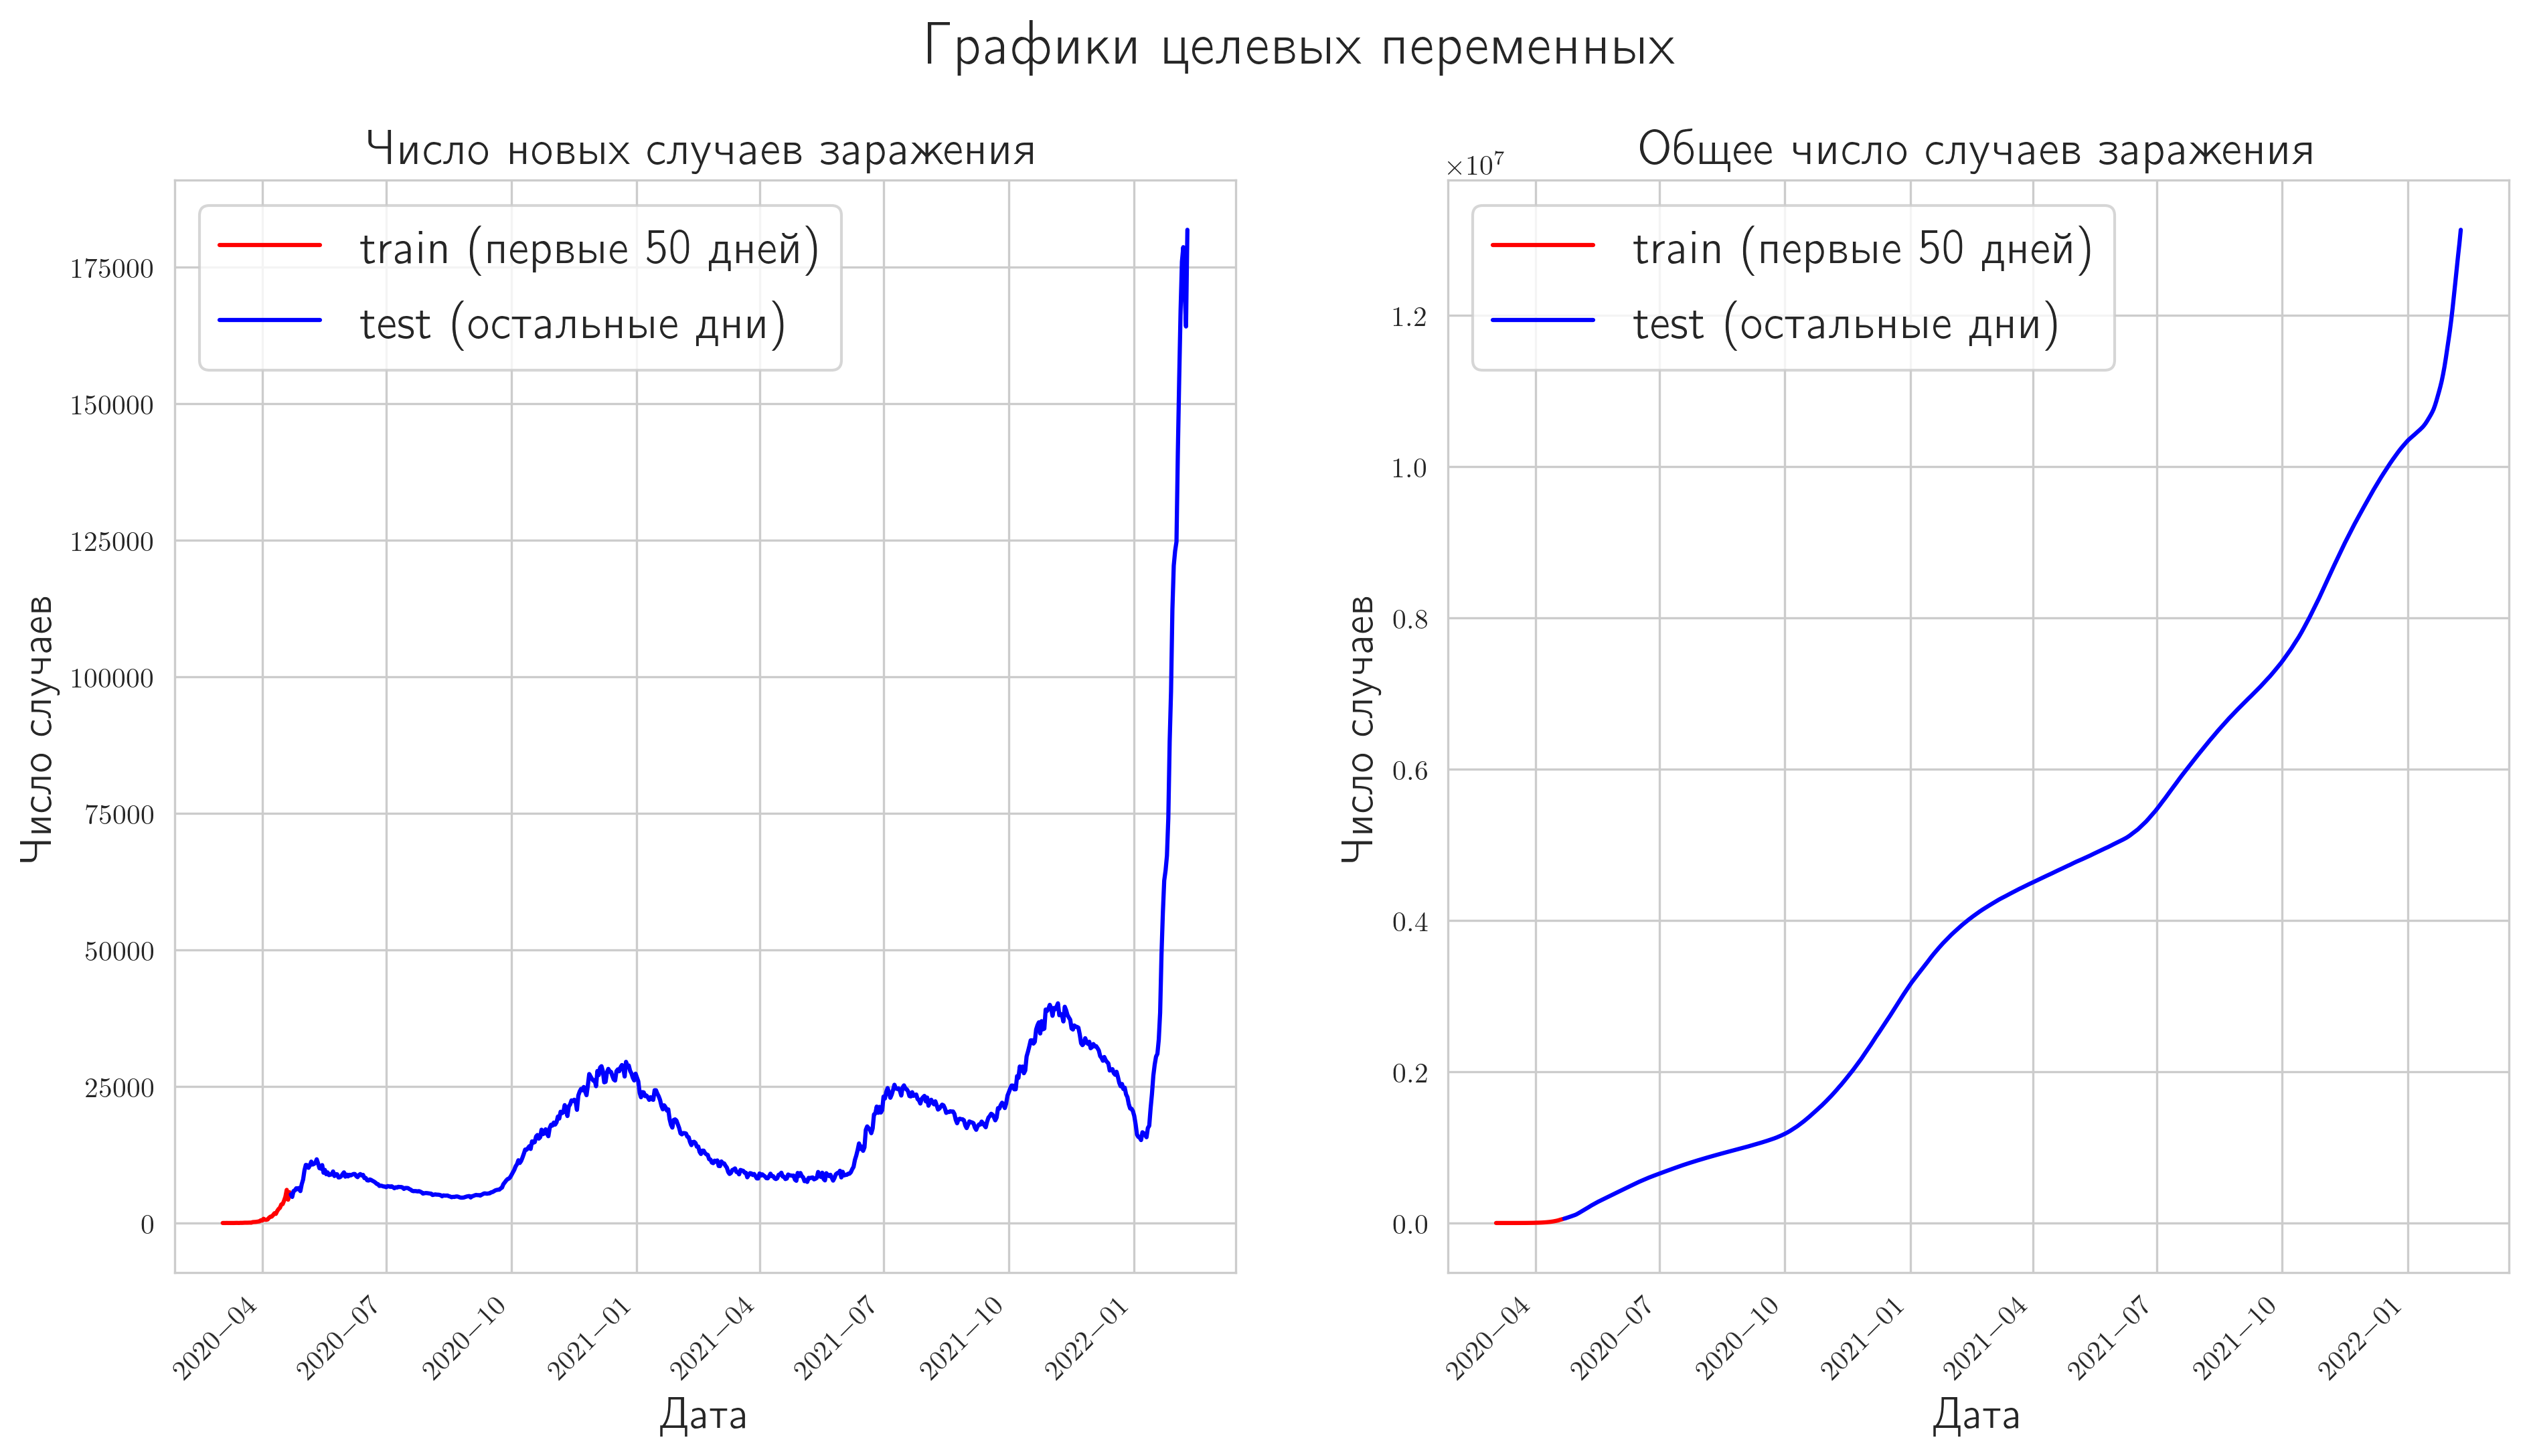

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
fig.autofmt_xdate(rotation=45)
fig.suptitle("Графики целевых переменных", fontsize=legend_fontsize + 4)

ax[0].margins(0.05)
ax[0].plot(train.date, train.new_cases, label="train (первые 50 дней)", color='r')
ax[0].plot(test.date, test.new_cases, label="test  (остальные дни)", color='b')
ax[0].set_title("Число новых случаев заражения", fontsize=legend_fontsize, fontname="Times New Roman Bold")
ax[0].set_xlabel("Дата", fontsize=axis_fontsize)
ax[0].set_ylabel("Число случаев", fontsize=axis_fontsize)
ax[0].legend(loc="upper left", fontsize=legend_fontsize)


ax[1].margins(0.05)
ax[1].plot(train.date, train.total_cases, label="train (первые 50 дней)", color='r')
ax[1].plot(test.date, test.total_cases, label="test  (остальные дни)", color='b')
ax[1].set_title("Общее число случаев заражения", fontsize=legend_fontsize, fontweight="bold")
ax[1].set_xlabel("Дата", fontsize=axis_fontsize)
ax[1].set_ylabel("Число случаев", fontsize=axis_fontsize)
ax[1].legend(loc="upper left", fontsize=legend_fontsize)

plt.show()

<font color='darkviolet'><i> 
✏️ Видим экспоненциальный рост общего числа наблюдений, однако из-за омикрон штамма график новых случае заражения исказился. Построим те же графики, но за первые $660$ дней, когда точно не было никакого омикрон штамма.
</i></font>

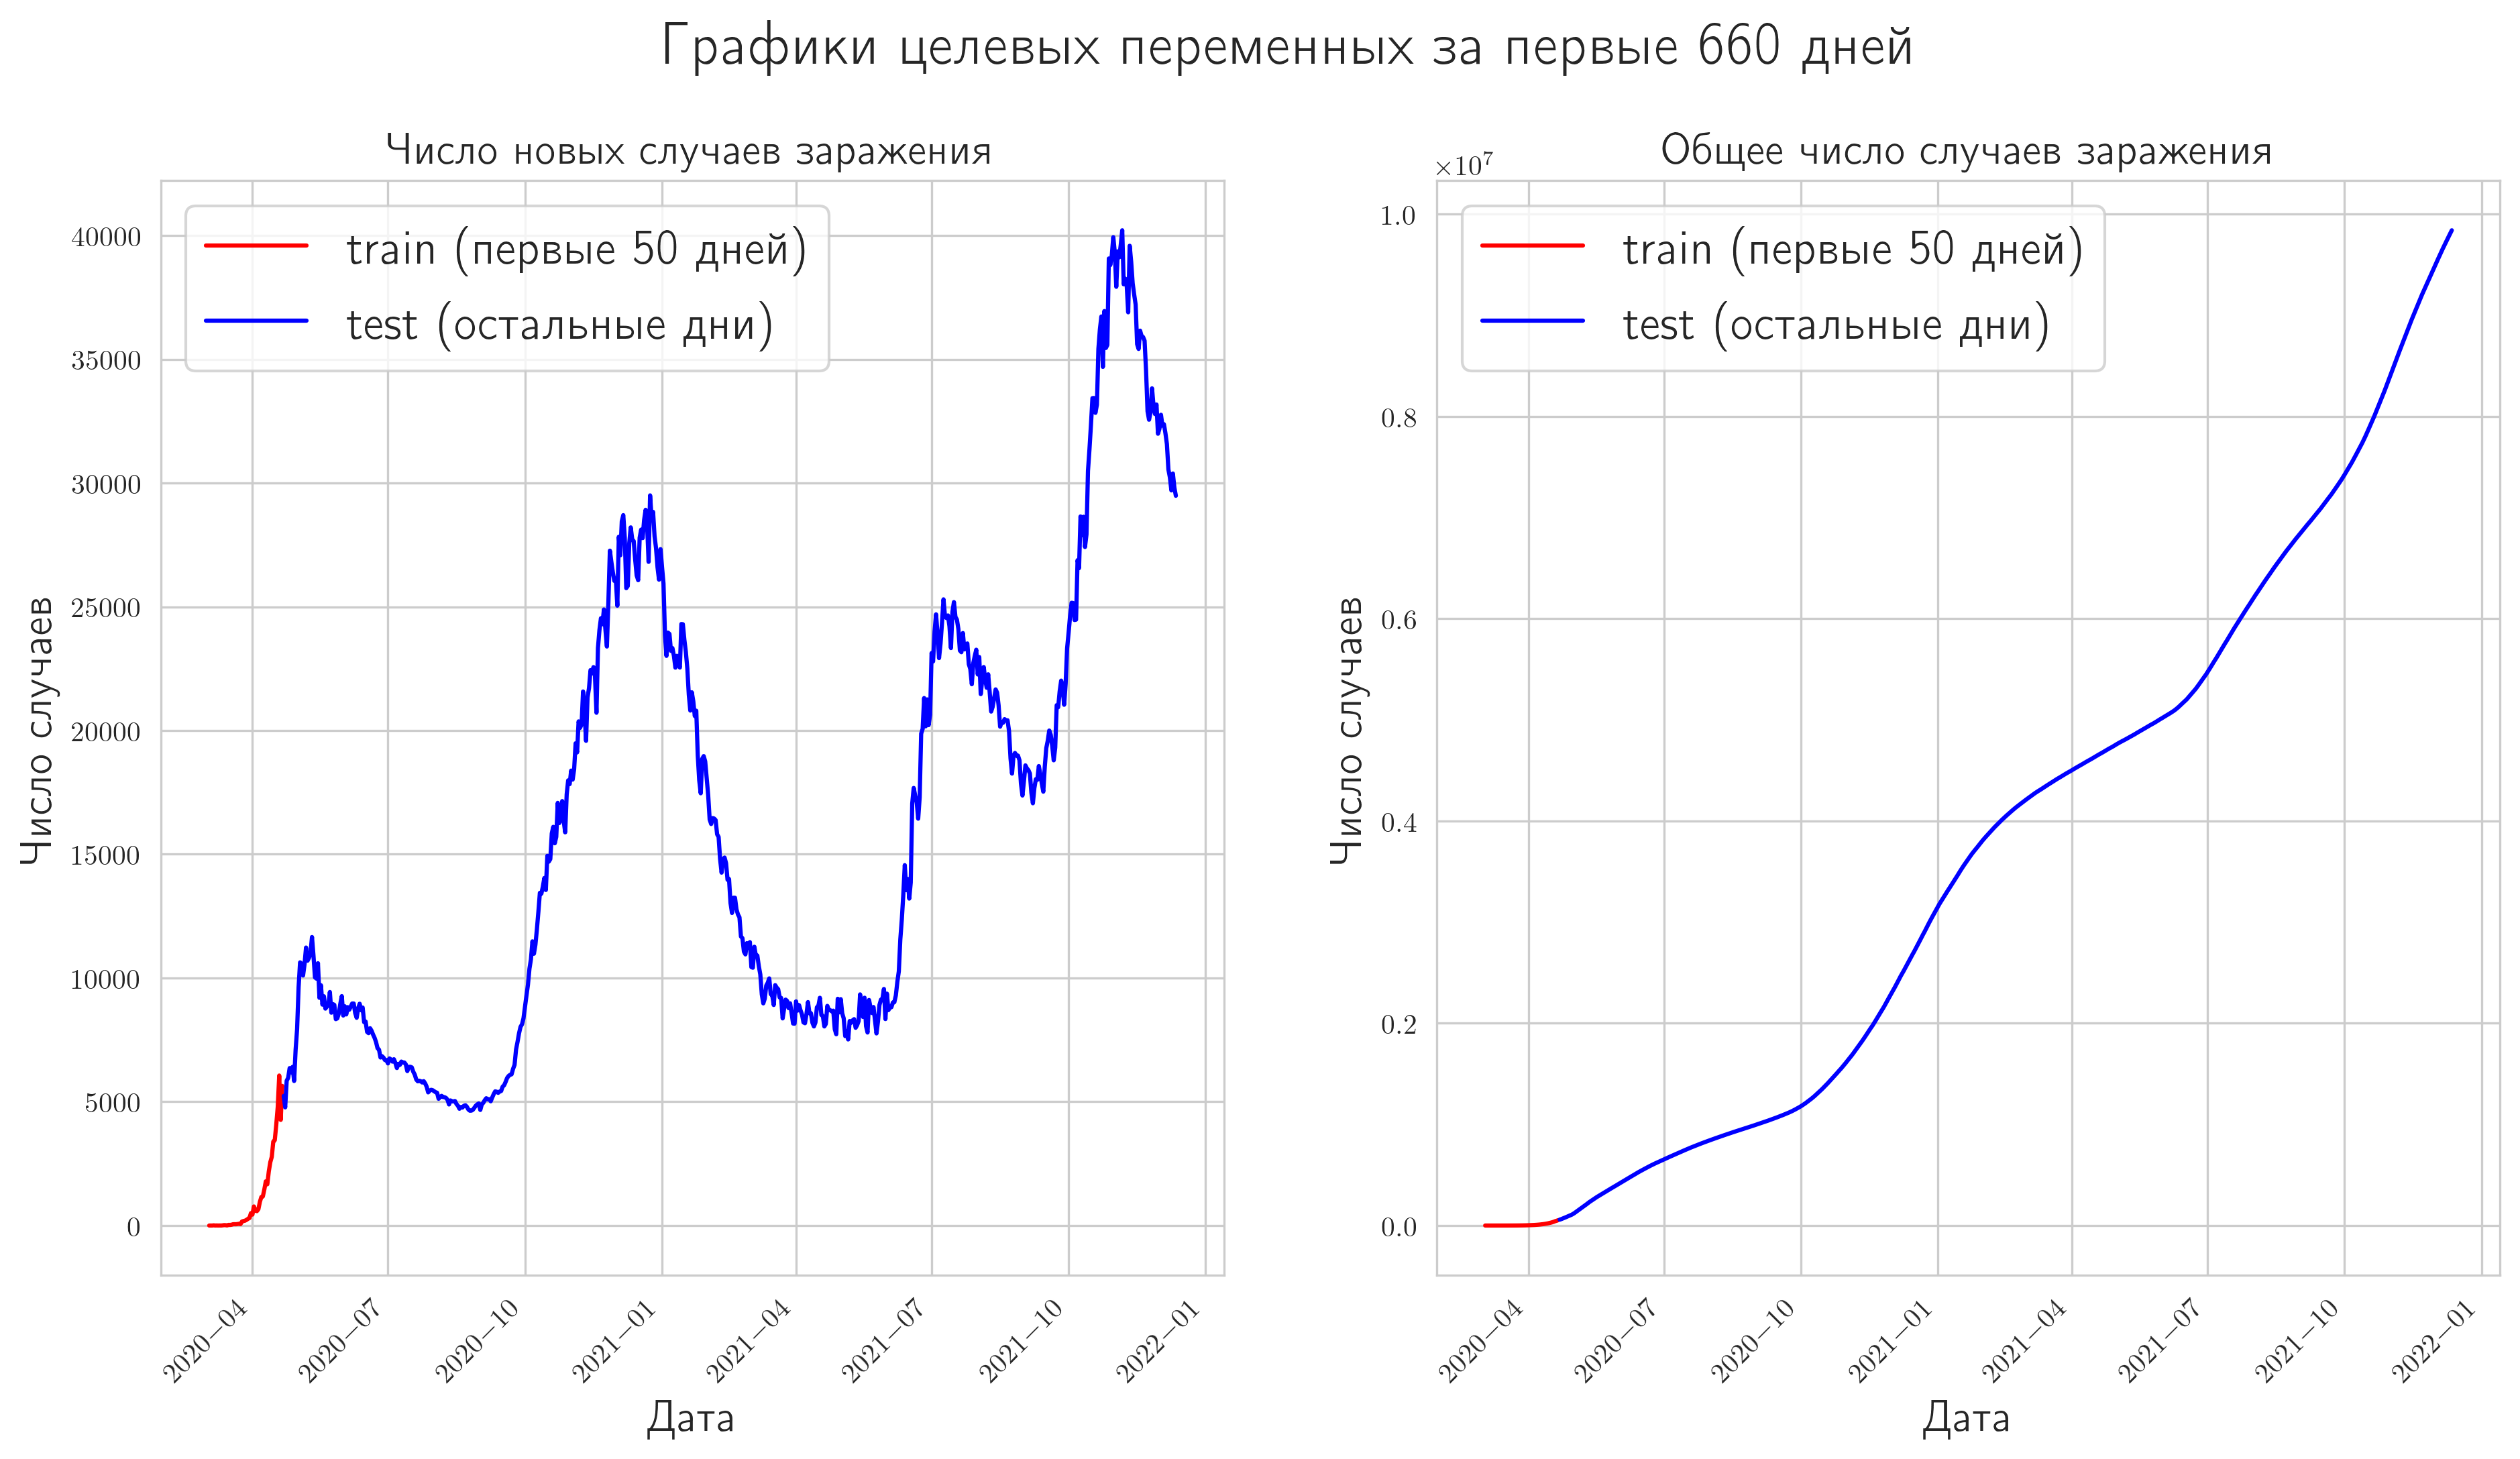

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
fig.autofmt_xdate(rotation=45)
fig.suptitle("Графики целевых переменных за первые 660 дней", fontsize=legend_fontsize + 4)

ax[0].margins(0.05)
ax[0].plot(train.date, train.new_cases, label="train (первые 50 дней)", color='r')
ax[0].plot(test.date[:600], test.new_cases[:600], label="test  (остальные дни)", color='b')
ax[0].set_title("Число новых случаев заражения", fontsize=16)
ax[0].set_xlabel("Дата", fontsize=axis_fontsize)
ax[0].set_ylabel("Число случаев", fontsize=axis_fontsize)
ax[0].legend(loc="upper left", fontsize=legend_fontsize)

ax[1].margins(0.05)
ax[1].plot(train.date, train.total_cases, label="train (первые 50 дней)", color='r')
ax[1].plot(test.date[:600], test.total_cases[:600], label="test  (остальные дни)", color='b')
ax[1].set_title("Общее число случаев заражения", fontsize=16)
ax[1].set_xlabel("Дата", fontsize=axis_fontsize)
ax[1].set_ylabel("Число случаев", fontsize=axis_fontsize)
ax[1].legend(loc="upper left", fontsize=legend_fontsize)

plt.show()

<font color='darkviolet'><i> 
✏️ Видим более приближенную картину, отдельно можно наблюдать за волнами короновируса.
</i></font>

In [5]:
test = test[:600]

### 2️⃣a)
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: $y$ $\sim$ exp(линейная функция от $x$), где $x$ — номер текущего дня.

<font color='darkviolet'><i> 
✏️ Получается, что $ln(y)$ $\sim$ линейная функция от $x$, где $x$ — номер текущего дня. А значит с помощью линейной регрессии мы будем предсказывать $ln(y)$. Будем предсказывать общее число случаев заражения, поскольку, именно график этой величины похож на экспоненту. (Но на самом деле разницы большой нет, ведь производная экспоненты есть экспонента :) )
</i></font>

In [6]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()

x_train = train['day'].values.reshape(-1, 1)
x_test = test['day'].values.reshape(-1, 1)

y_train = np.log(train["total_cases"]).values.reshape(-1, 1)
y_test = np.log(test["total_cases"]).values.reshape(-1, 1)

lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

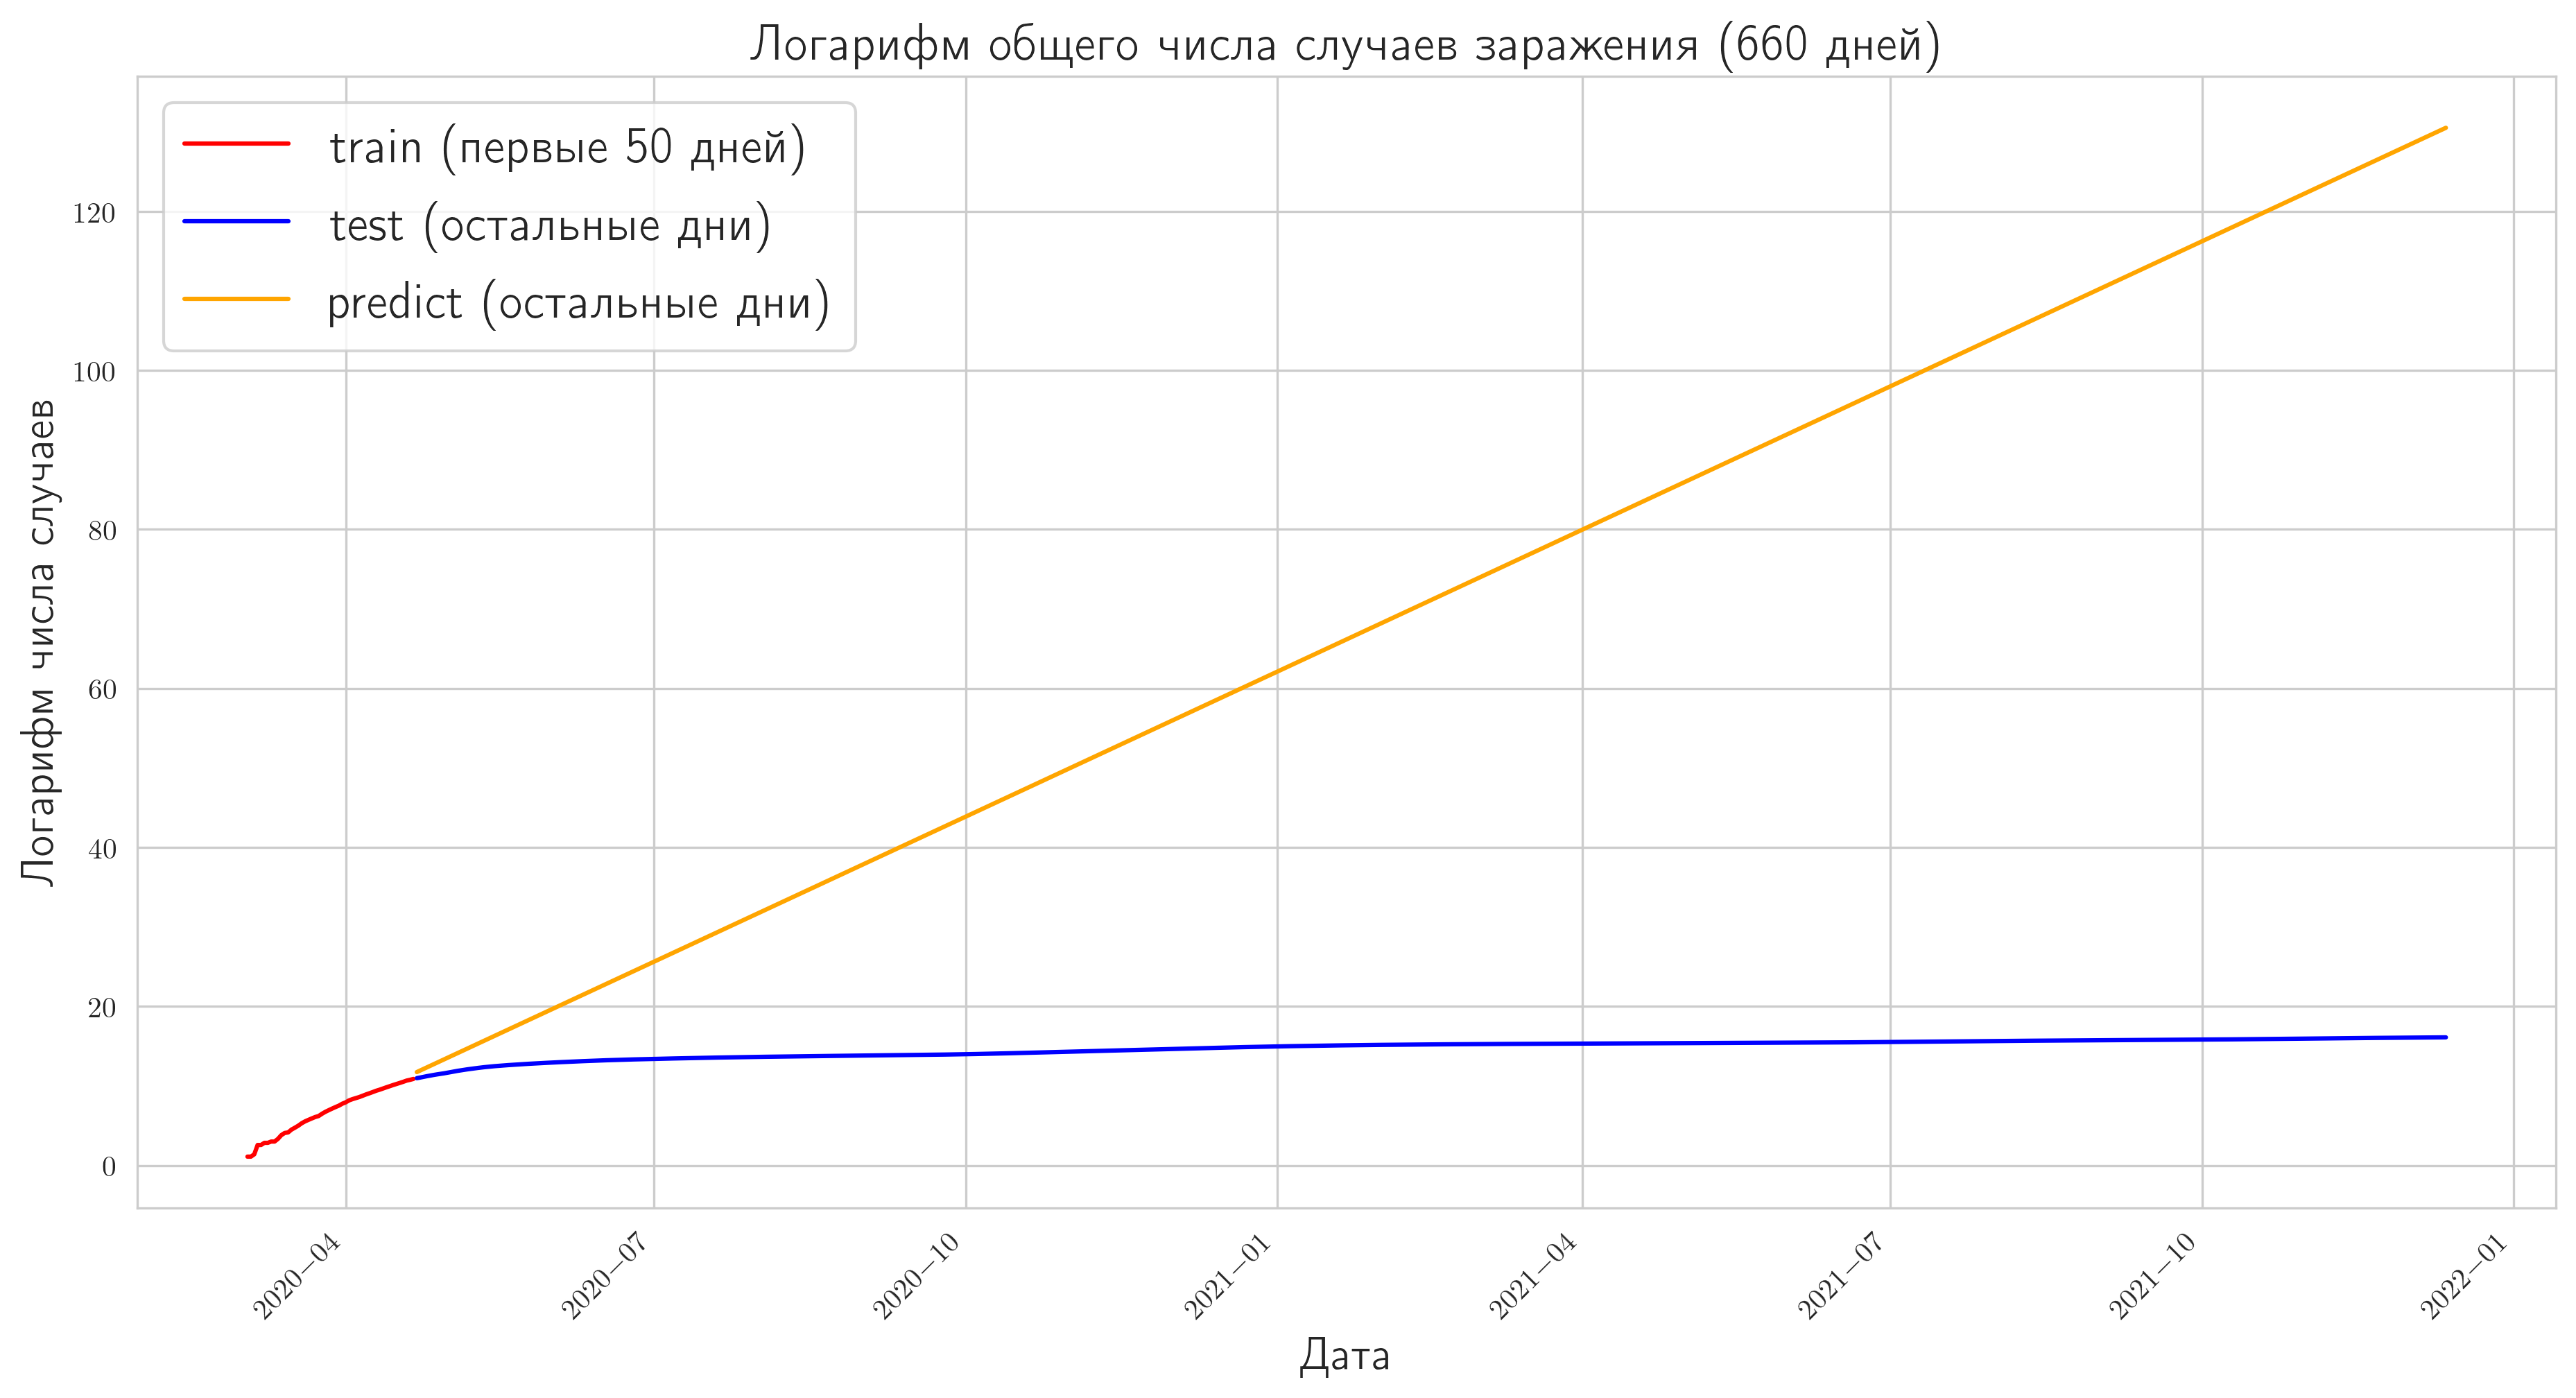

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
fig.autofmt_xdate(rotation=45)

ax.margins(0.05)
ax.plot(train.date, y_train , label="train (первые 50 дней)", color='r')
ax.plot(test.date[:600], y_test, label="test  (остальные дни)", color='b')
ax.plot(test.date[:600], lr_pred, label="predict (остальные дни)", color='orange')
ax.set_title("Логарифм общего числа случаев заражения (660 дней)", fontsize=legend_fontsize)
ax.set_xlabel("Дата", fontsize=axis_fontsize)
ax.set_ylabel("Логарифм числа случаев", fontsize=axis_fontsize)
ax.legend(loc="upper left", fontsize=legend_fontsize)

plt.show()

<font color='darkviolet'><i> 
✏️ Да, предсказания оказались грустными, и это даже если смотреть по логарифму, экспоненты будут отличаться еще сильнее.
</i></font>

### 2️⃣b)
Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [8]:
sigma_noise = np.std(lr_model.predict(x_train) - y_train)
sigma_noise

0.34904220596356594

In [9]:
N = 1000
X = np.linspace(1.4, 1.8, N)
Y = np.linspace(0, 0.4, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((1.4, 1.8))
    plt.ylim((0, 0.4))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

In [10]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.float64(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix)))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [11]:
cur_mu = np.array([0, 0])
cur_sigma = np.array([[20, 0], [0, 20]])

for i in range(train.shape[0]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma,
                                        train.iloc[i]['day'], np.log(train.iloc[i]['total_cases']),
                                        sigma_noise=sigma_noise)

In [12]:
print("Апостериорное распределение параметров этой модели:\n")
print("mu = {}\n".format(cur_mu))
print("sigma = {}".format(cur_sigma))

Апостериорное распределение параметров этой модели:

mu = [1.62163475 0.19831499]

sigma = [[ 1.00397504e-02 -2.98210366e-04]
 [-2.98210366e-04  1.16959489e-05]]


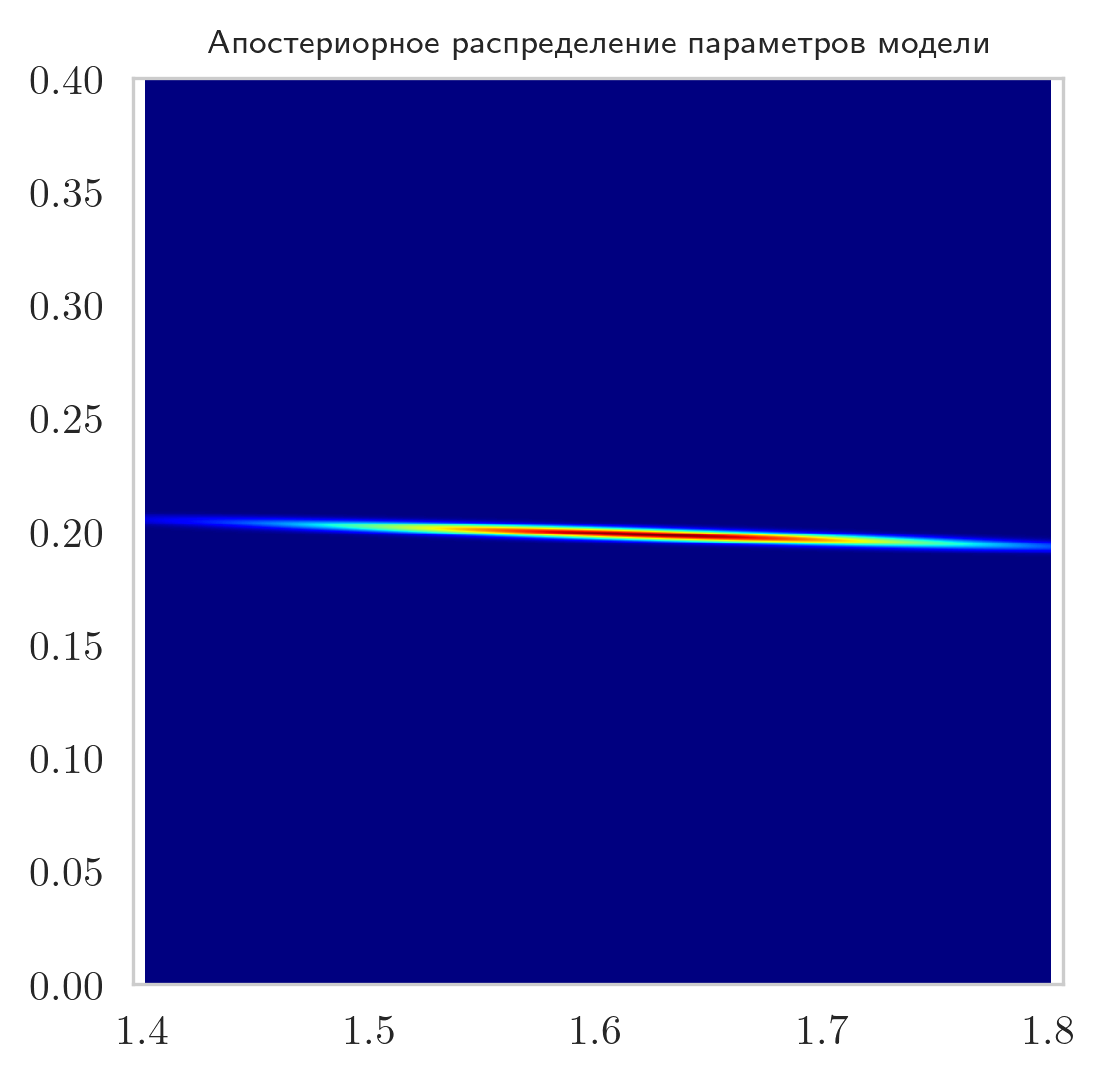

In [13]:
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.set_xlim((1.4, 1.8))
ax.set_ylim((0, 0.4))
ax.set_title("Апостериорное распределение параметров модели", fontsize=8)
myplot_heatmap(Z)

### 2️⃣c)
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к $1$ мая? к $1$ июня? к $1$ сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

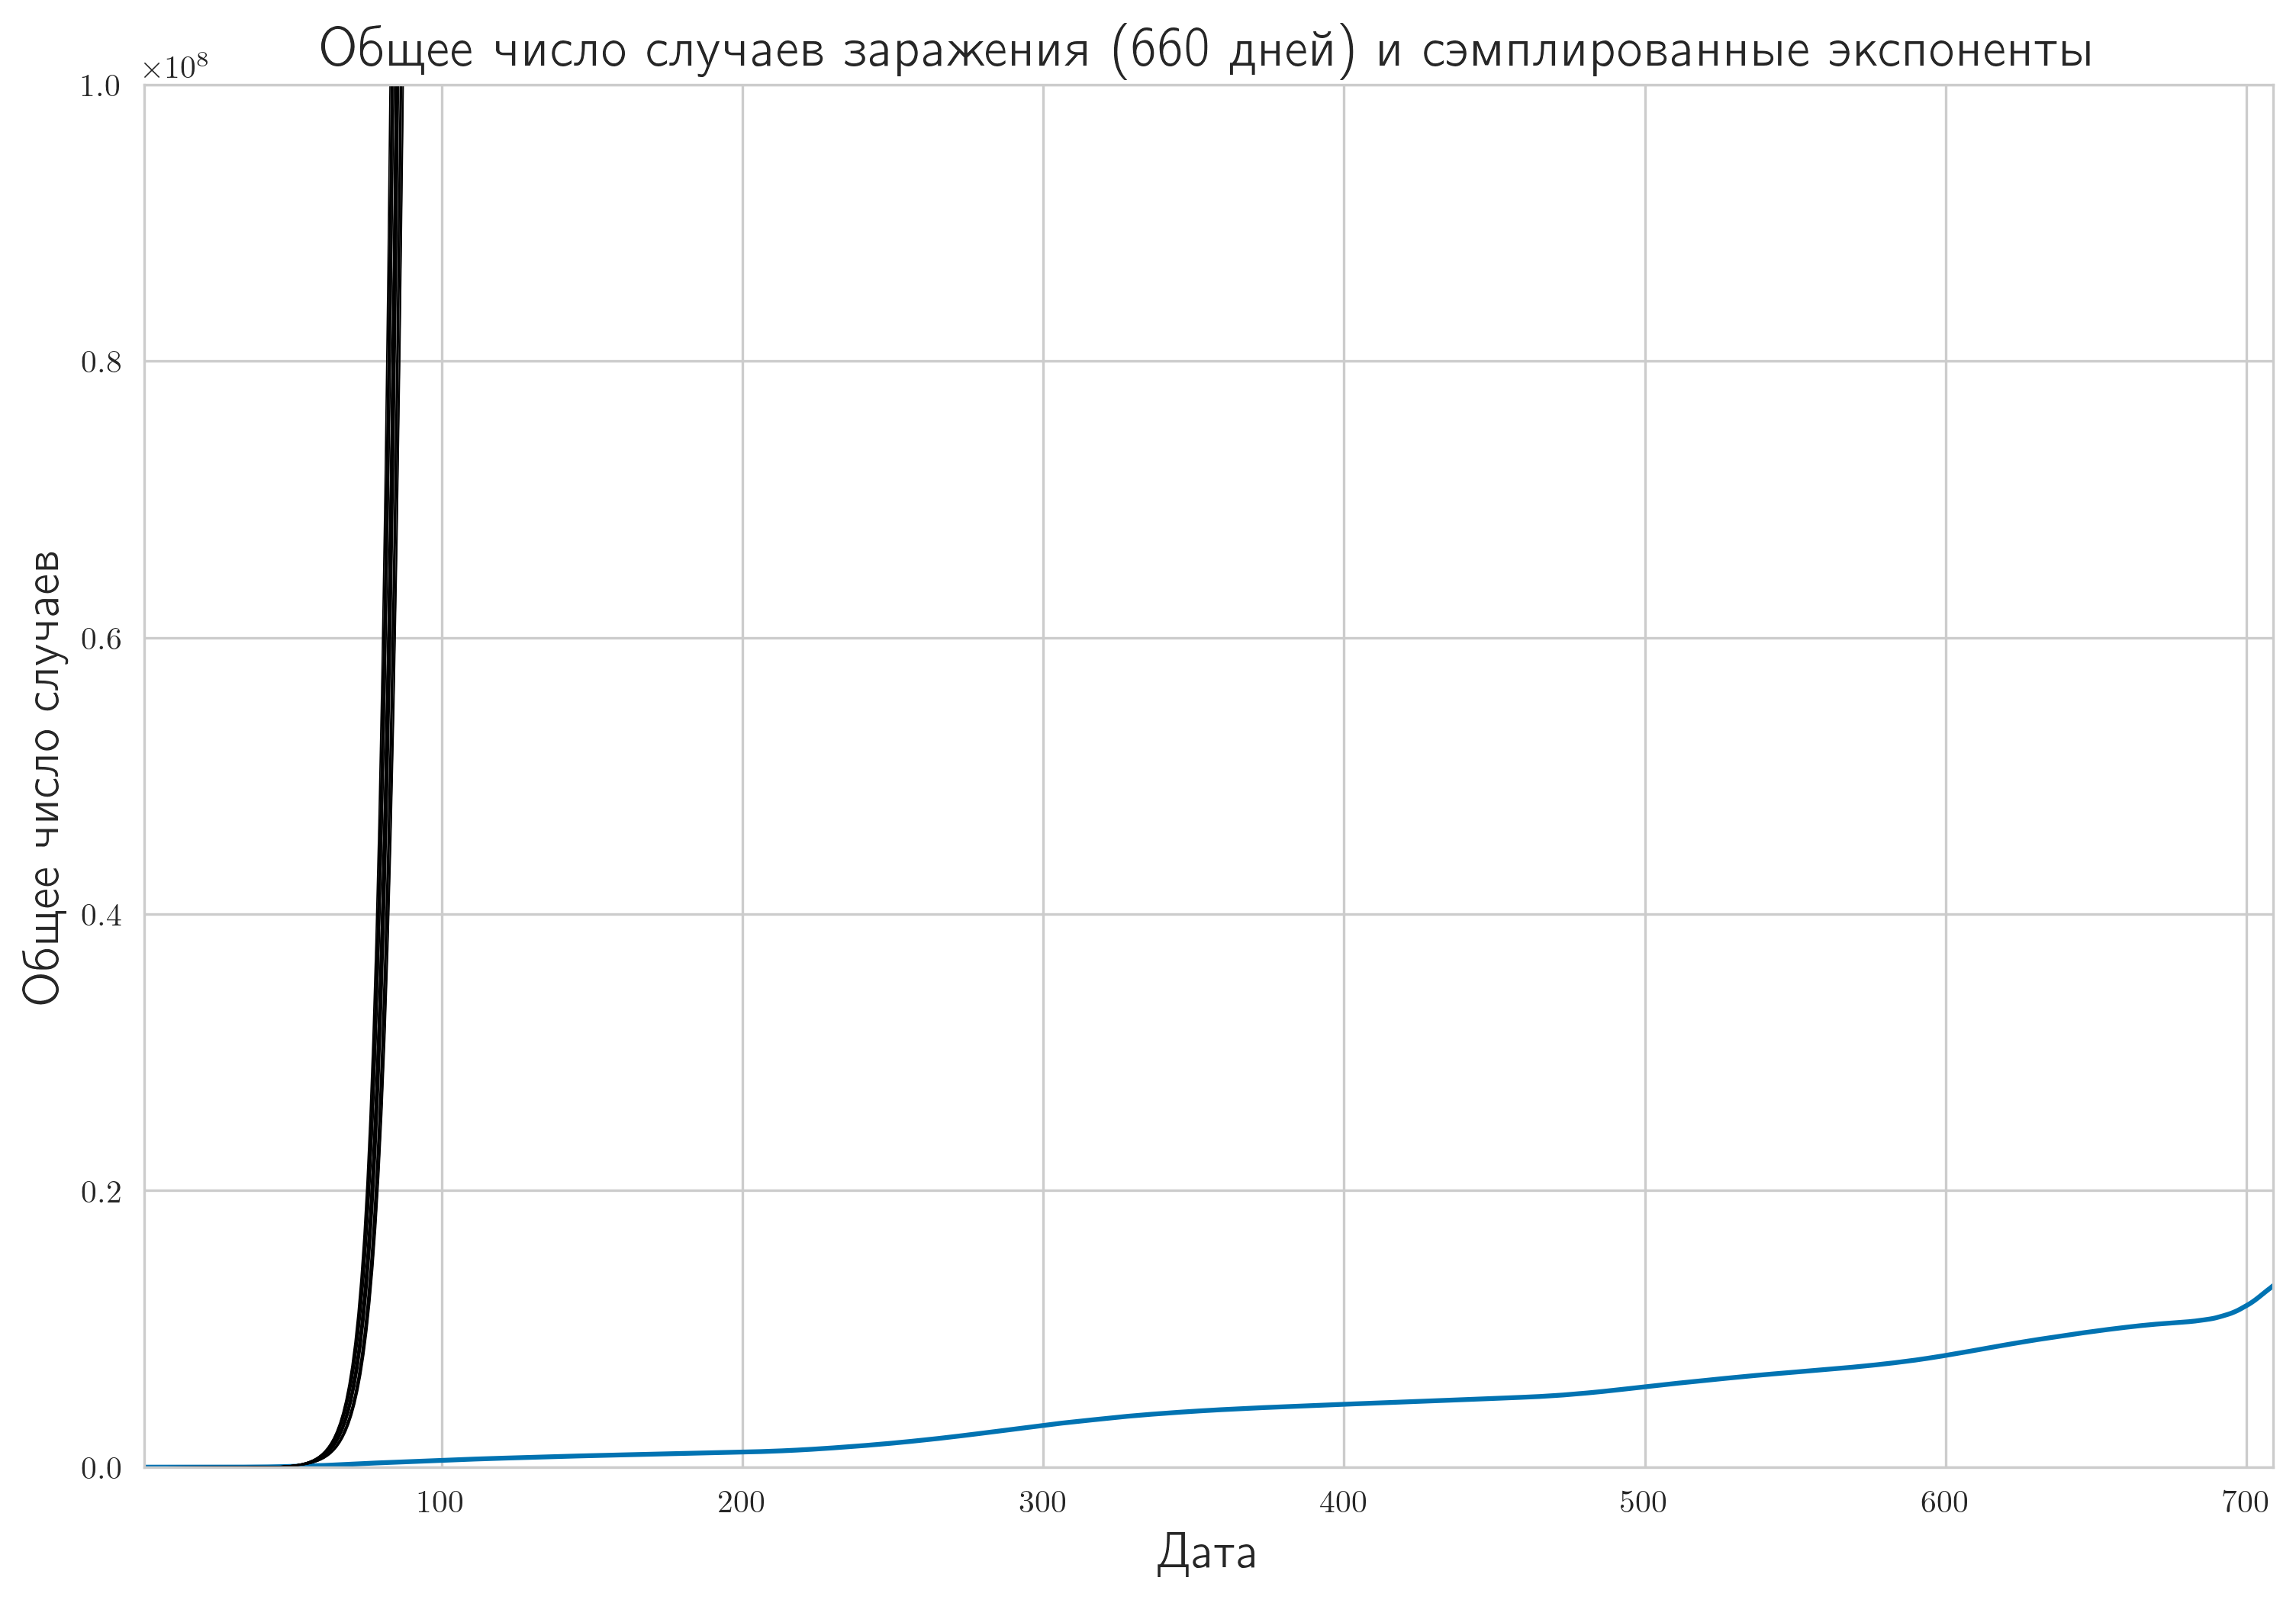

In [14]:
def myplot_sample_lines(mu, sigma, xs, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
        
        
x_all = df['day'].values.reshape(-1, 1)
y_all = df['total_cases'].values.reshape(-1, 1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.set_xlim((x_all[0], x_all[-1]))
ax.set_ylim((0, 10**8))
ax.plot(x_all, y_all)
ax.set_xlabel("Дата", fontsize=axis_fontsize)
ax.set_ylabel("Общее число случаев", fontsize=axis_fontsize)
ax.set_title("Общее число случаев заражения (660 дней) и сэмплированные экспоненты", fontsize=legend_fontsize)
myplot_sample_lines(cur_mu, cur_sigma, x_all)

In [15]:
def myplot_sample_lines(mu, sigma, xs, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, w[0] + w[1]*xs, 'k-', lw=.4)
        
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

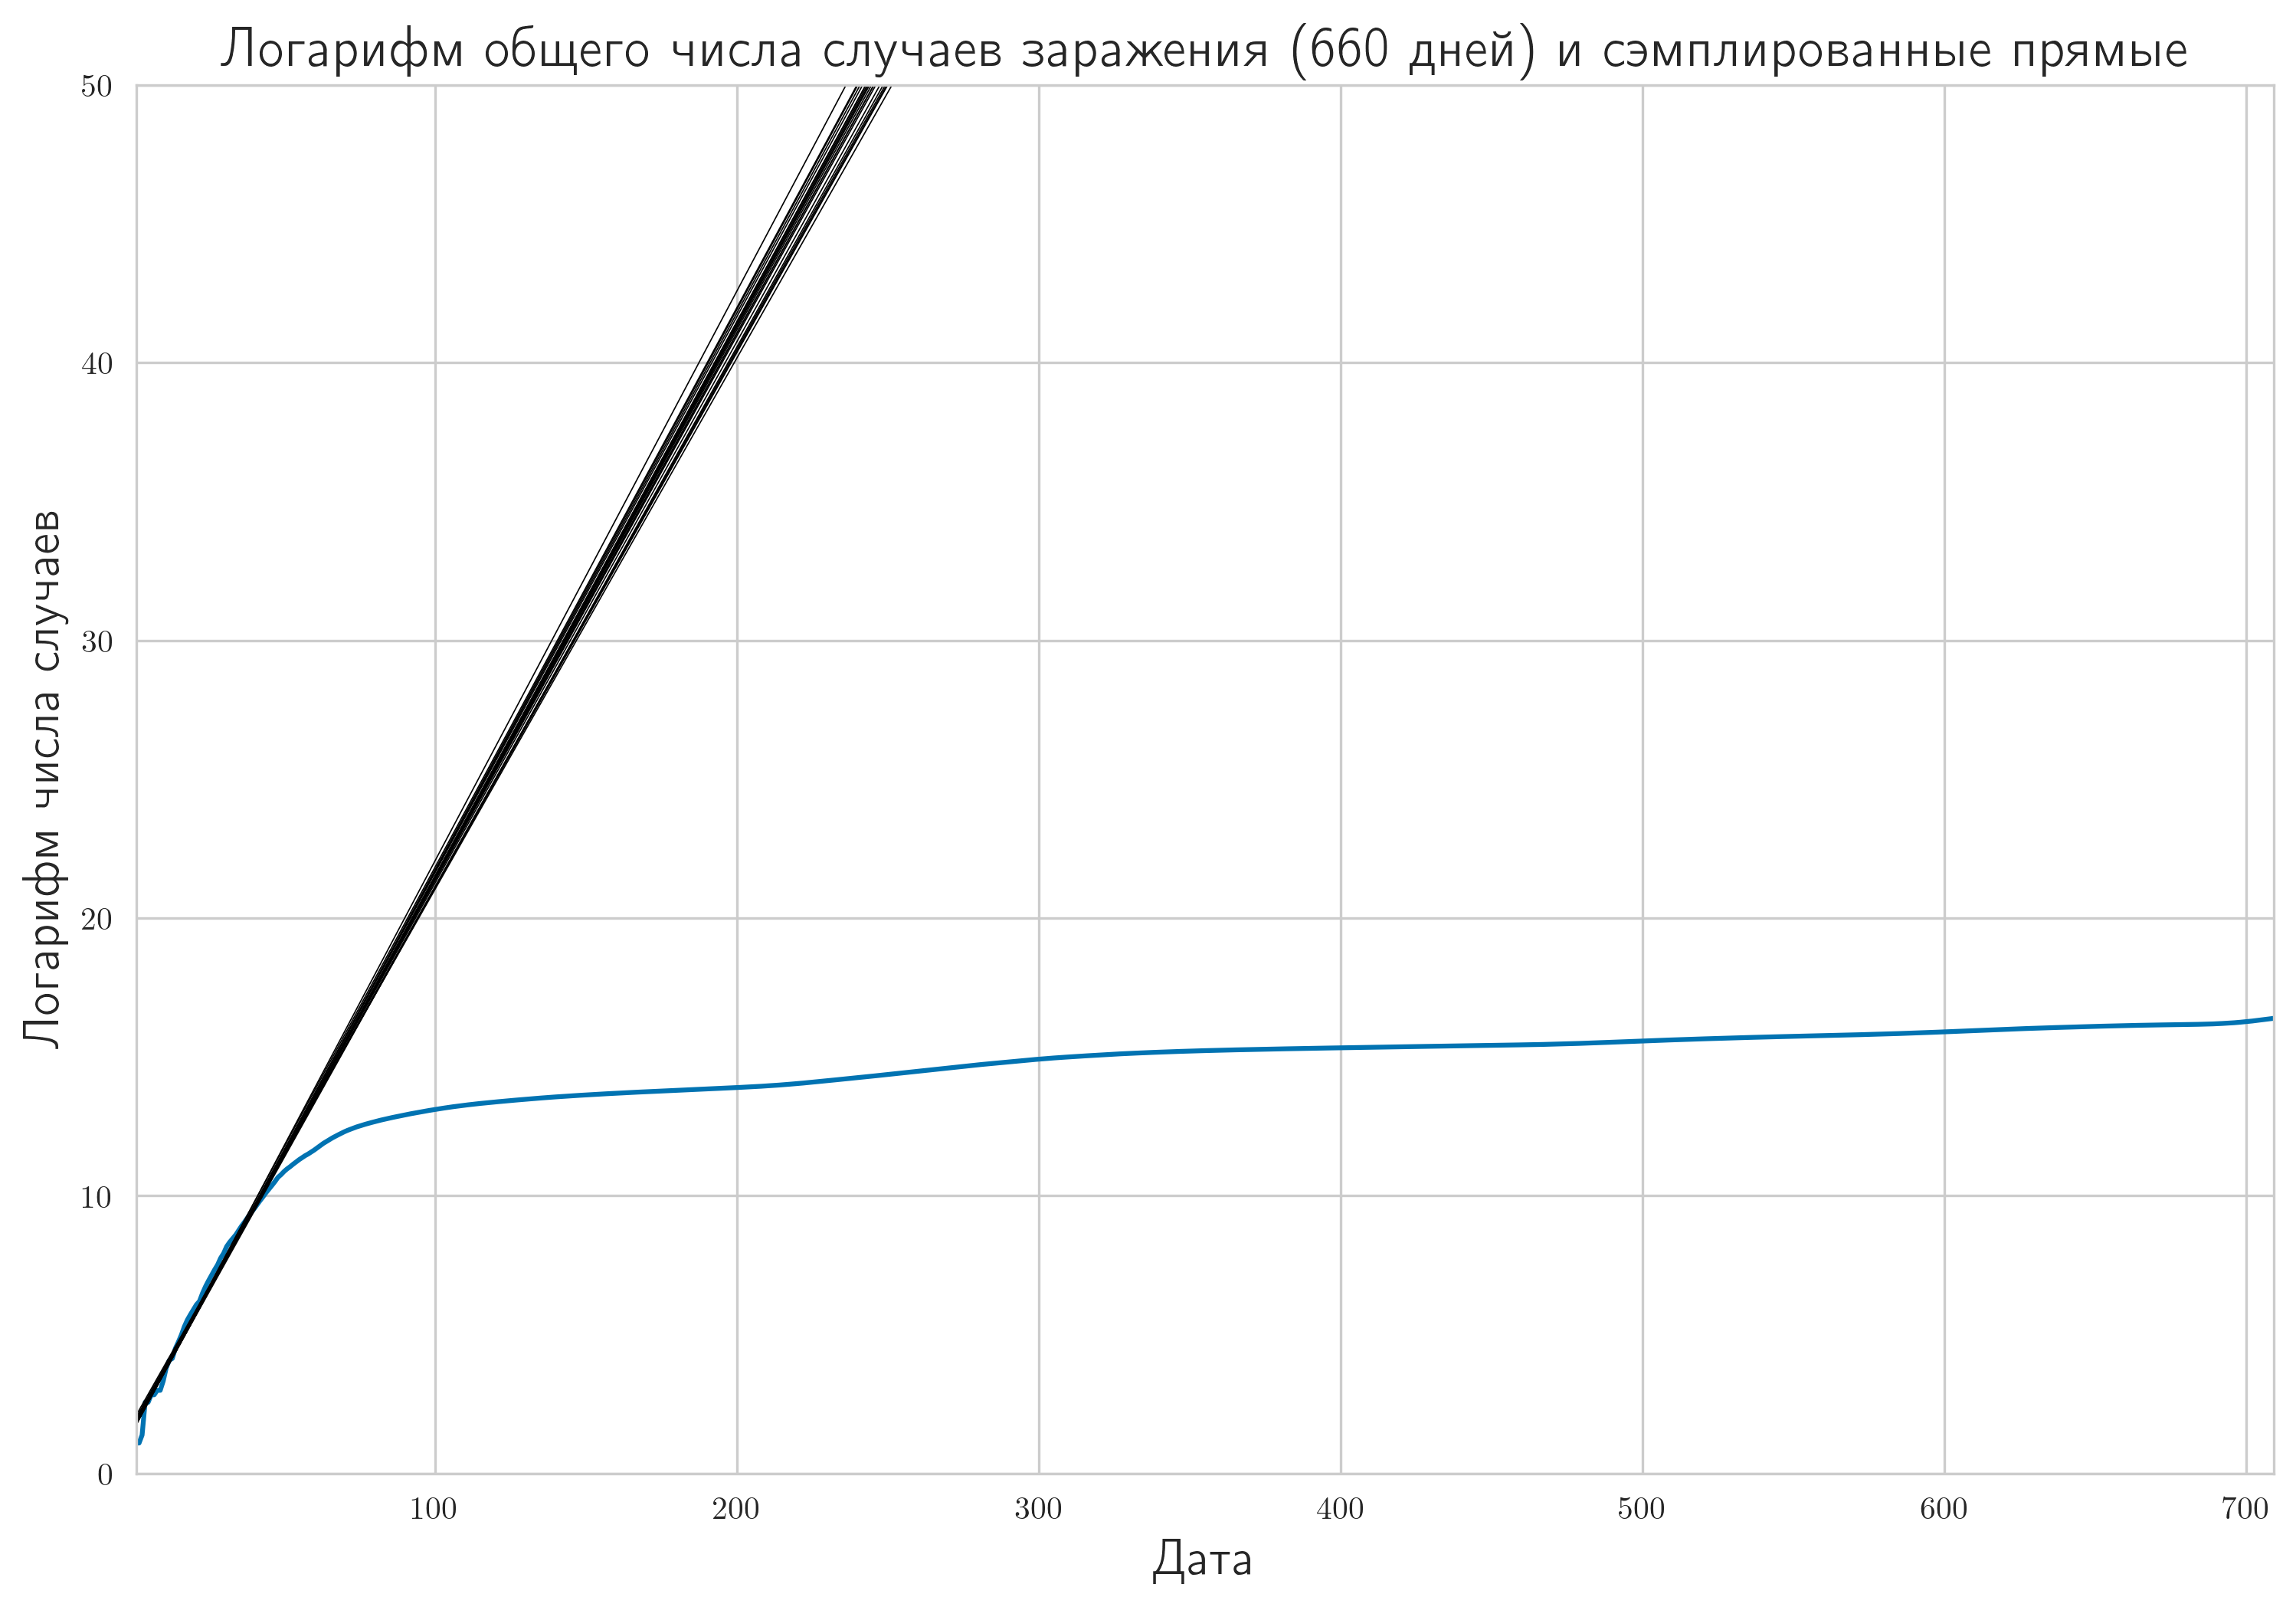

In [16]:
x_all = df['day'].values.reshape(-1, 1)
y_all = df['total_cases'].values.reshape(-1, 1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.set_xlim((x_all[0], x_all[-1]))
ax.set_ylim((0, 50))
ax.plot(x_all, np.log(y_all))
ax.set_xlabel("Дата", fontsize=axis_fontsize)
ax.set_ylabel("Логарифм числа случаев", fontsize=axis_fontsize)
ax.set_title("Логарифм общего числа случаев заражения (660 дней) и сэмплированные прямые", fontsize=legend_fontsize)
myplot_sample_lines(cur_mu, cur_sigma, x_all)

<font color='darkviolet'><i> 
✏️ Видим достаточно плотный пучок прямых (поскольку $50$ точек вносят большую определенность для линейной регрессии). Прямк уходят на бесконечность и не соответсвуют истинному логарифму от общего числа заболевших.
</i></font>

In [17]:
start_date = datetime(2020, 3, 3) 

may = datetime(2020, 5, 1)
june = datetime(2020, 6, 1)
september = datetime(2020, 9, 1)

days_to_may = (may - start_date).days
days_to_june = (june - start_date).days
day_to_september = (september - start_date).days

sample_exponents = []
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 1000)
for w in my_w:
    sample_exponents.append(np.exp(w[0] + w[1] * x_all))
sample_exponents = np.array(sample_exponents)

print("Предсказание случаев коронавируса в России к  1  мая: {}".format(int(sample_exponents.mean(axis=0)[days_to_may][0])))
print("Предсказание случаев коронавируса в России к  1  июня: {}".format(int(sample_exponents.mean(axis=0)[days_to_june][0])))
print("Предсказание случаев коронавируса в России к  1  сентября: {}".format(int(sample_exponents.mean(axis=0)[day_to_september][0])))

Предсказание случаев коронавируса в России к  1  мая: 750809
Предсказание случаев коронавируса в России к  1  июня: 356897503
Предсказание случаев коронавируса в России к  1  сентября: 33465231593914888


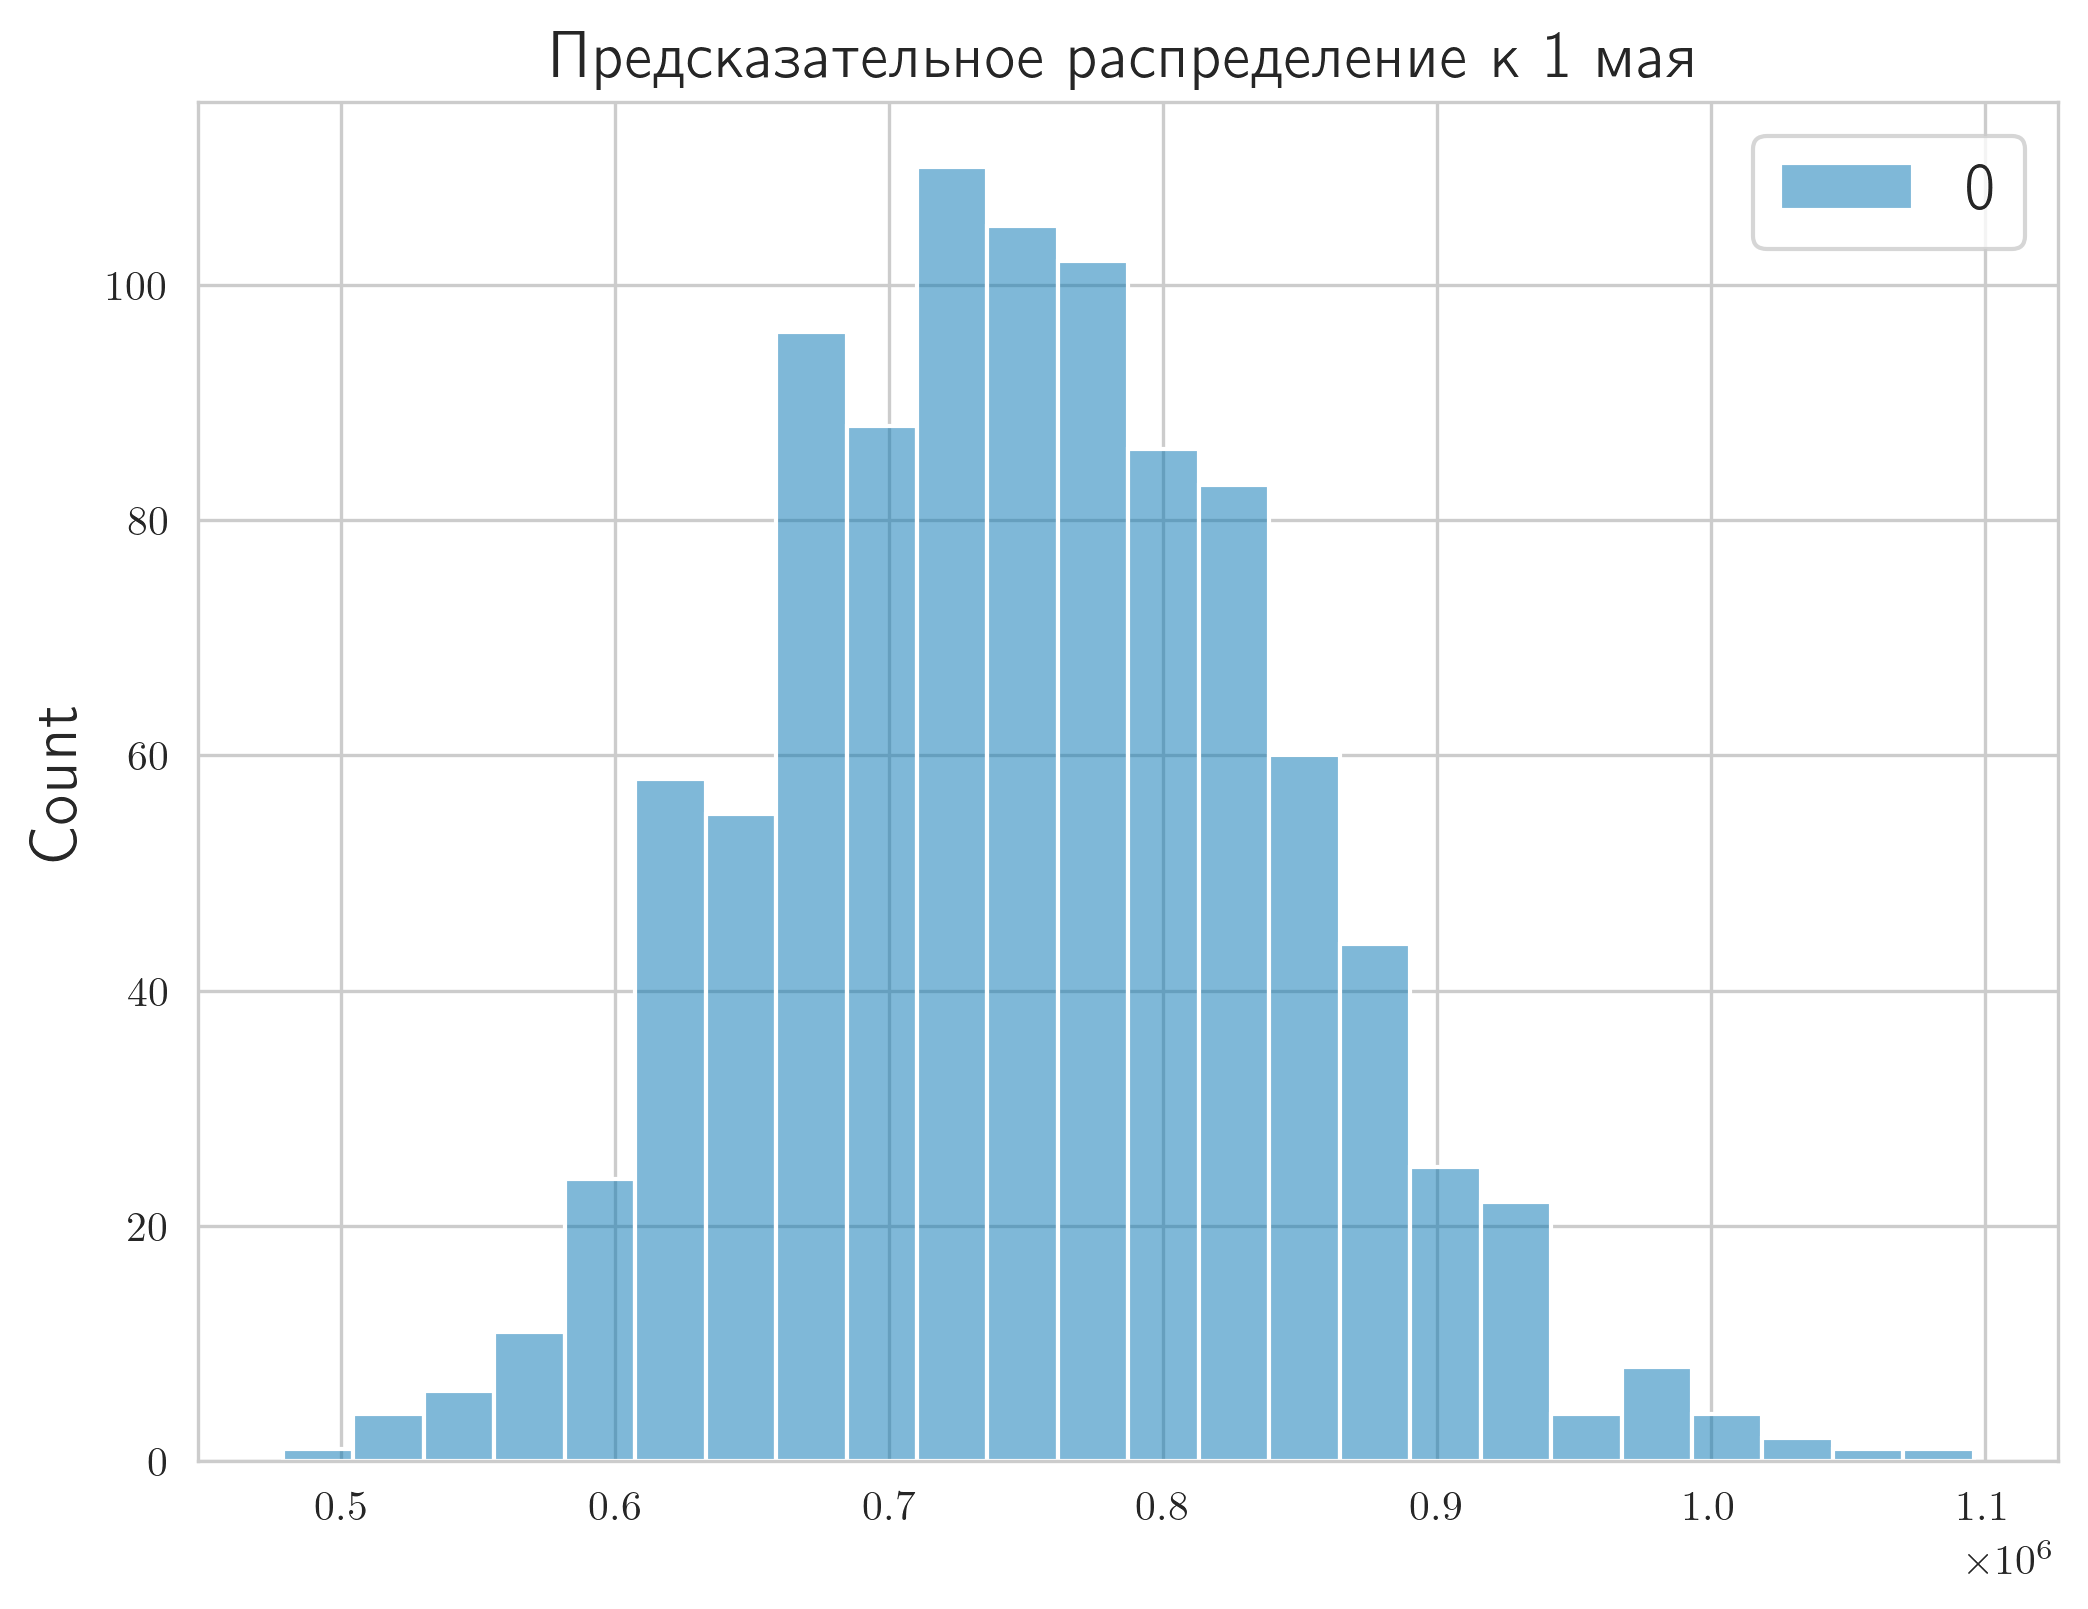

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(sample_exponents[:, days_to_may])
ax.set_title("Предсказательное распределение к 1 мая")
plt.show()

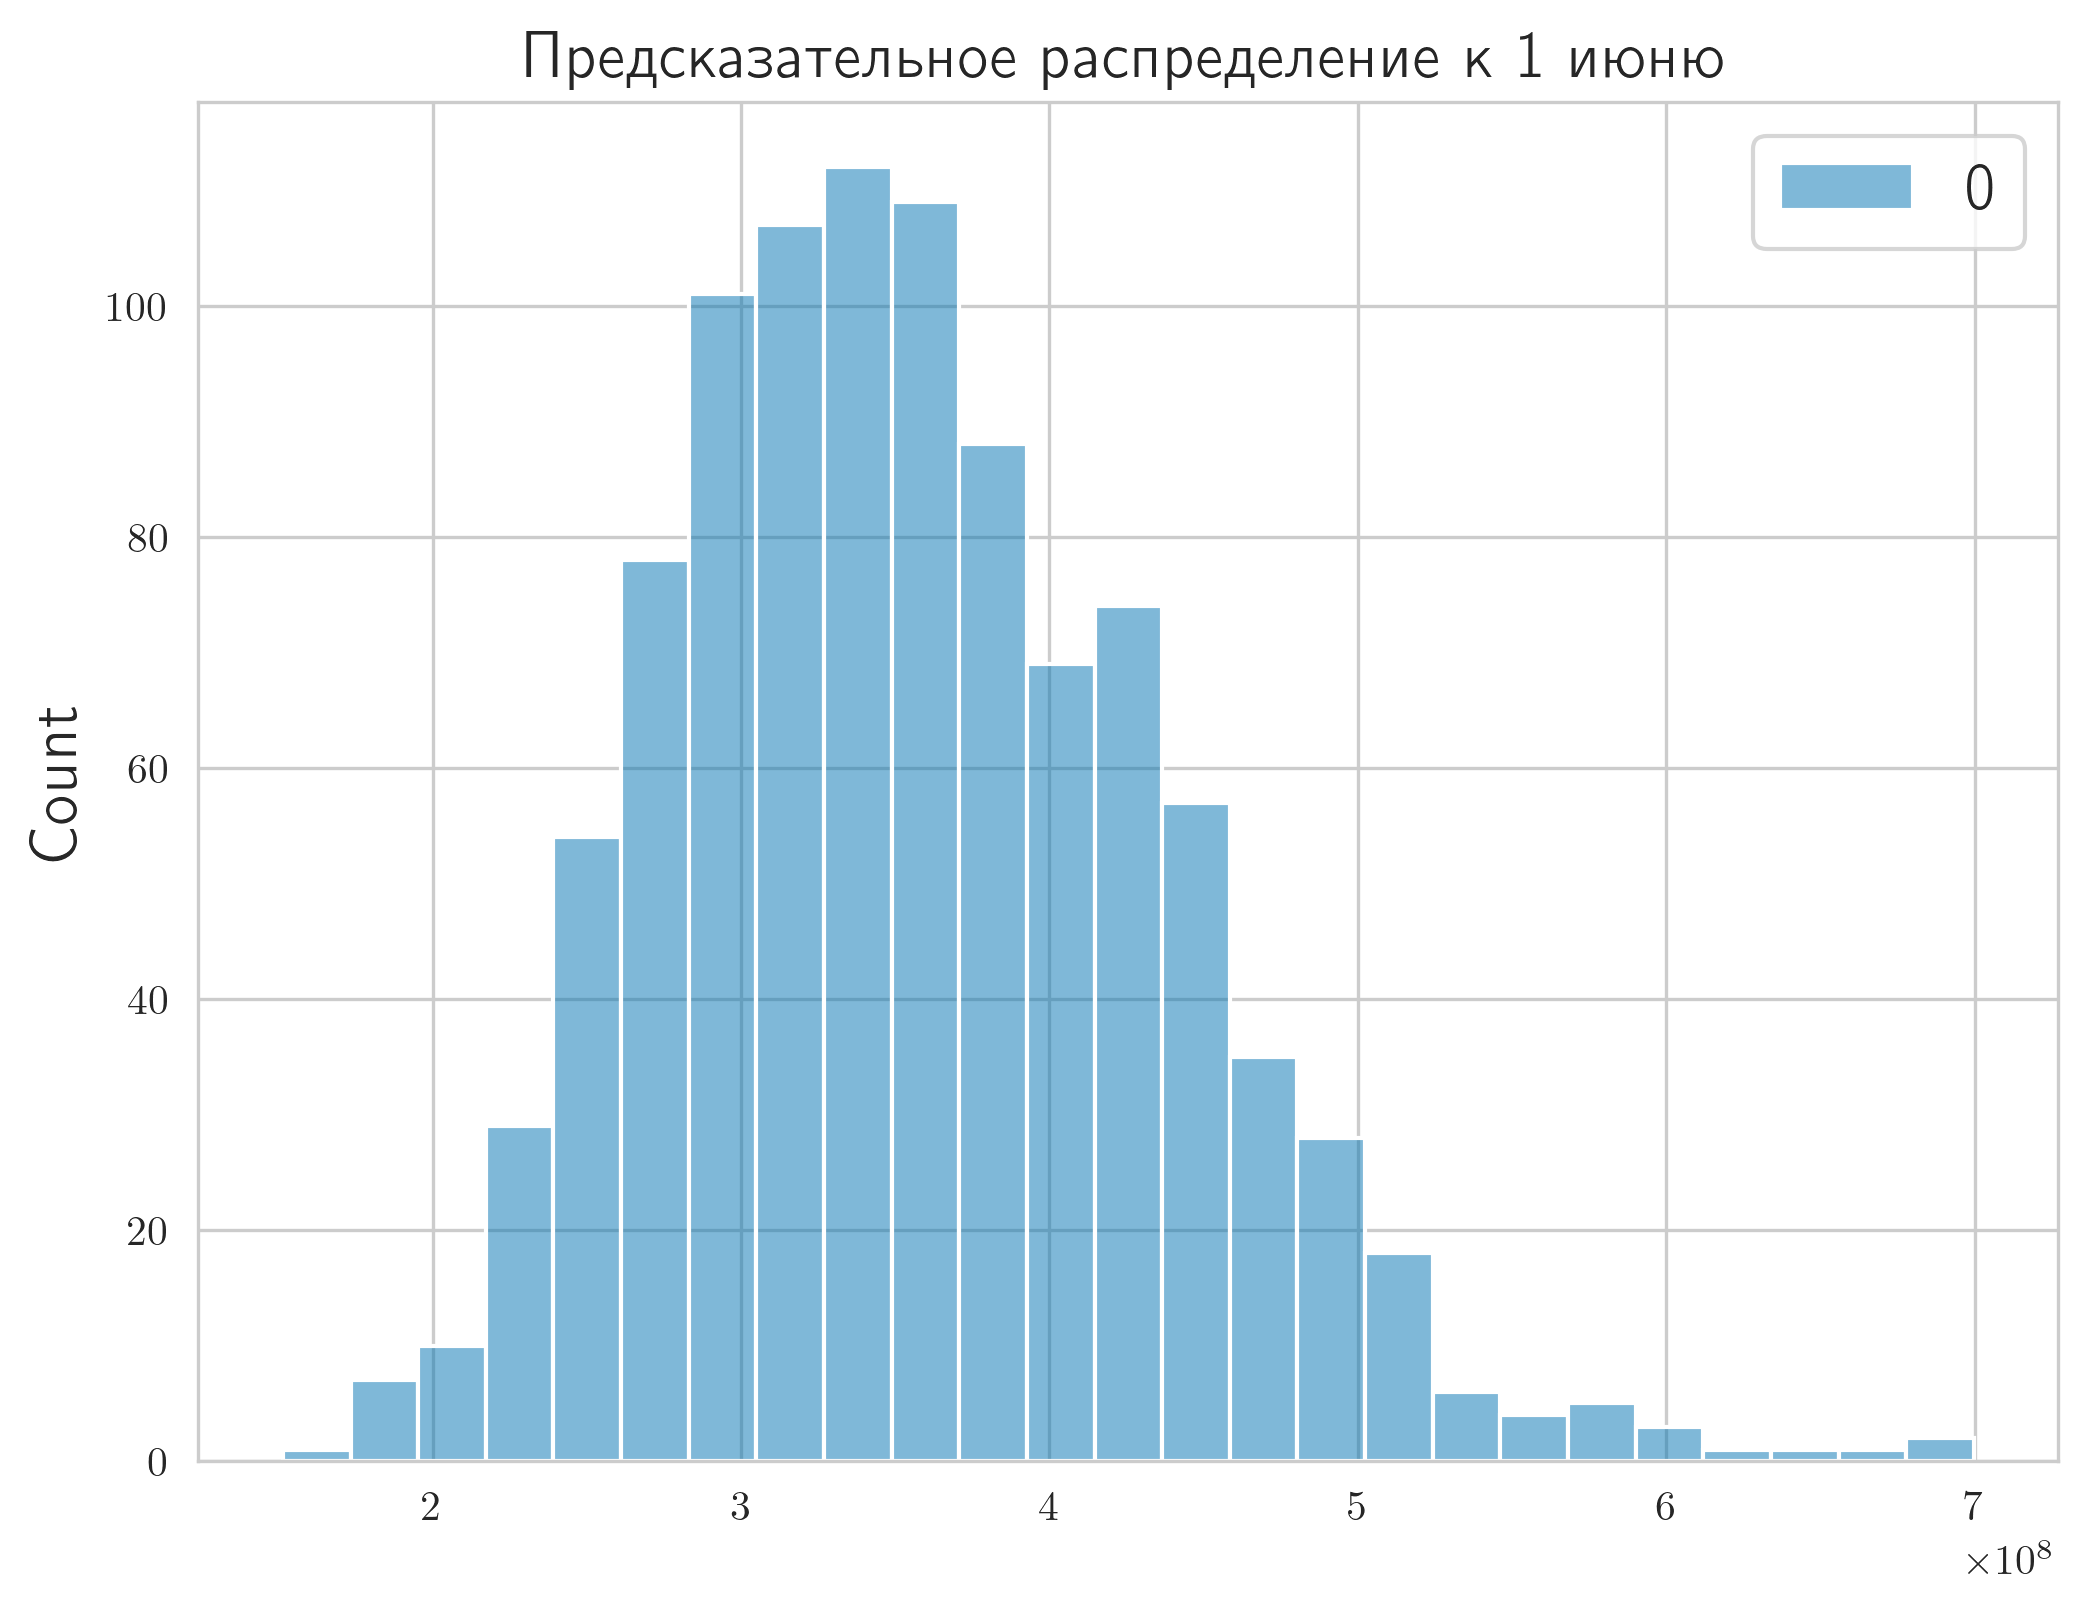

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(sample_exponents[:, days_to_june])
ax.set_title("Предсказательное распределение к 1 июню")
plt.show()

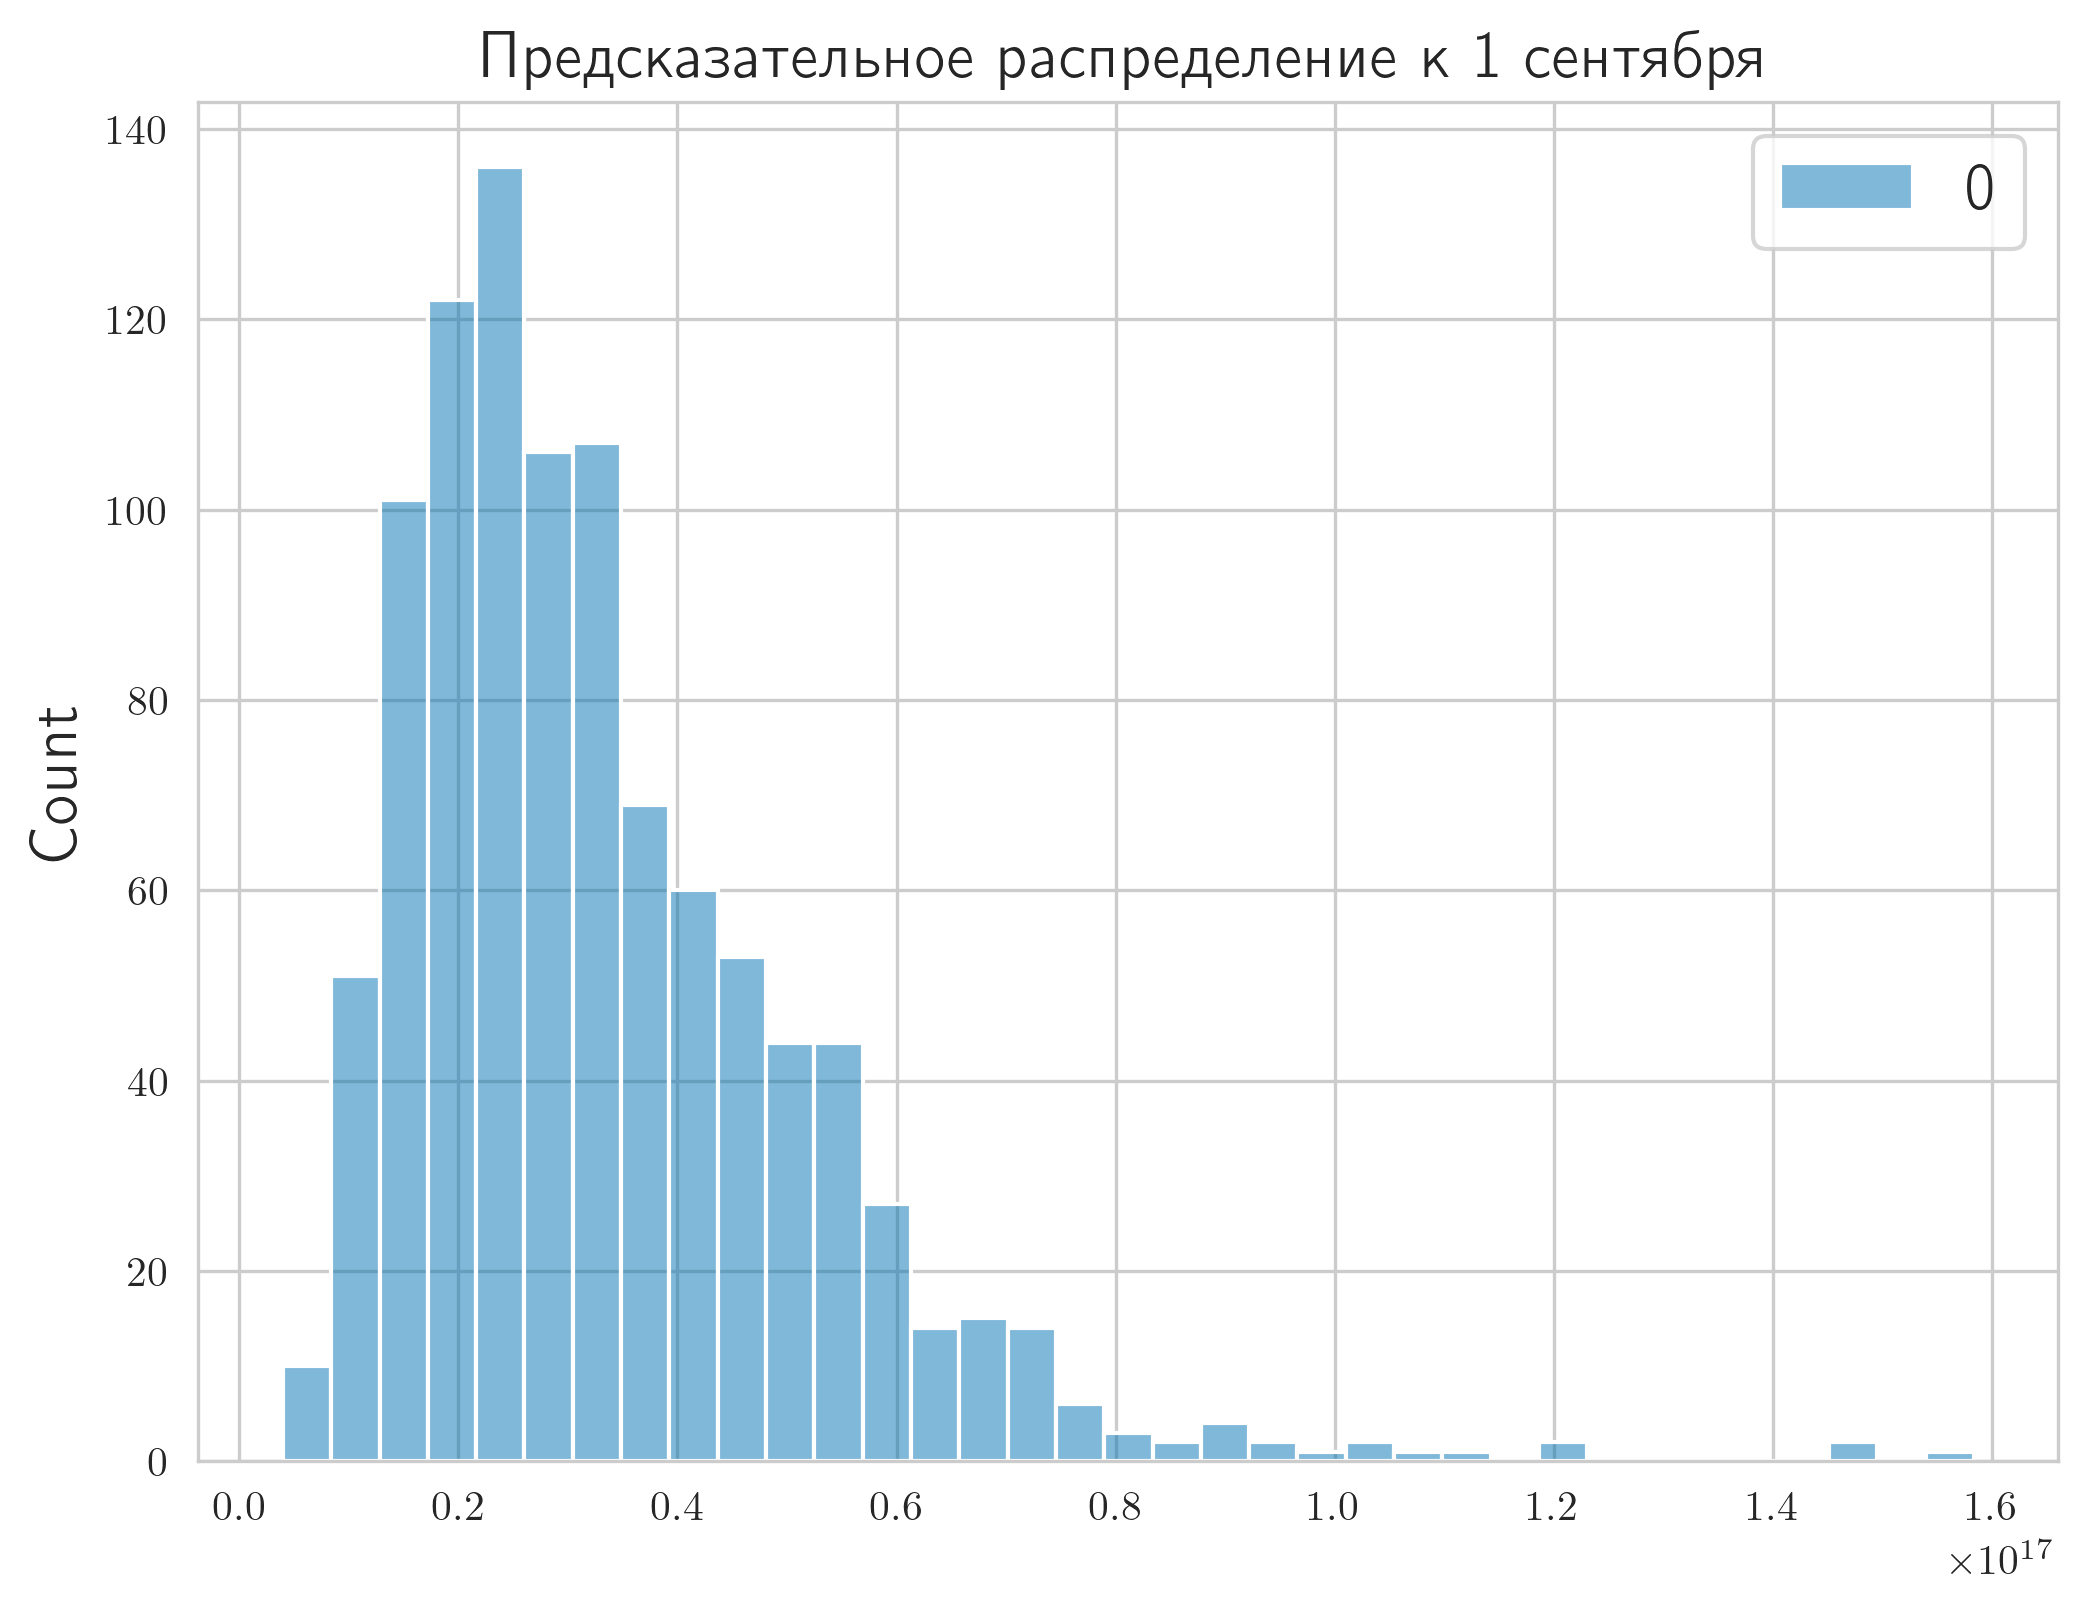

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(sample_exponents[:, day_to_september])
ax.set_title("Предсказательное распределение к 1 сентября")
plt.show()

## 3️⃣

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана: $$\large{Ф(x) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^x e^{-\frac{t^2}{2}}\,dt}$$
[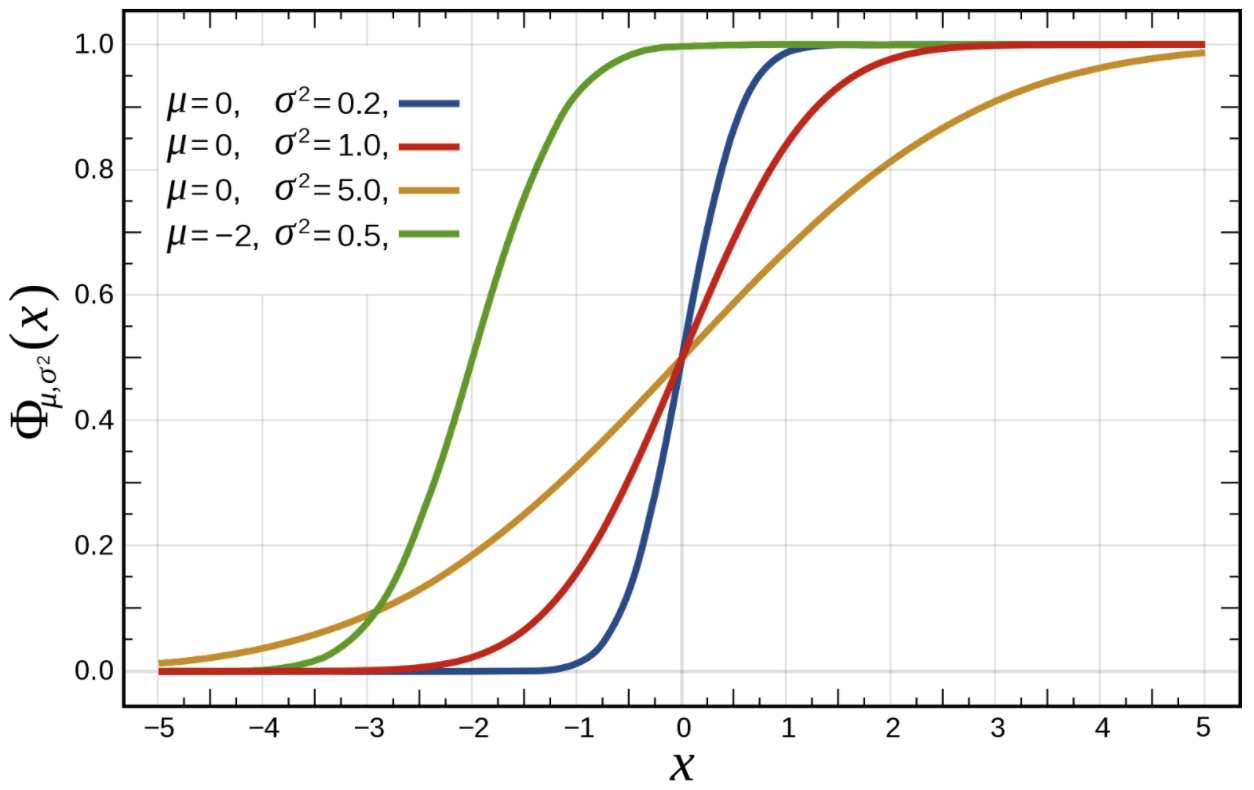](attachment:hw1_image.png)
Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от $t$.

### 3️⃣a)
Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

<font color='darkviolet'><i> 
✏️
$$\large{total\_cases = \int\limits_{-\infty}^x e^{w_2t^2 + w_1t + w_0}\,dt}$$
$\newline$
$$\large{new\_cases = total\_cases' = e^{w_2t^2 + w_1t + w_0}}$$
$\newline$
$$\large{ln(new\_cases) = ln(total\_cases') = w_2t^2 + w_1t + w_0}$$
</i></font>
    
<font color='darkviolet'><i> 
Таким образом, достаточно обучить линейную регрессию с квадратичным признаком и предсказать $new\_cases$. После этого можно суммировать $new\_cases$ до соотвествующего дня и получить прогноз $total\_cases$ к этому дню.
</i></font>
    


### 3️⃣b)
Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [21]:
lr_model2 = LinearRegression()

df['day2'] = df['day']**2

train = df[df.date < date_of_separation]
test = df[df.date >= date_of_separation]

lr_model2.fit(train[['day', 'day2']], np.log(train['new_cases']))

LinearRegression()

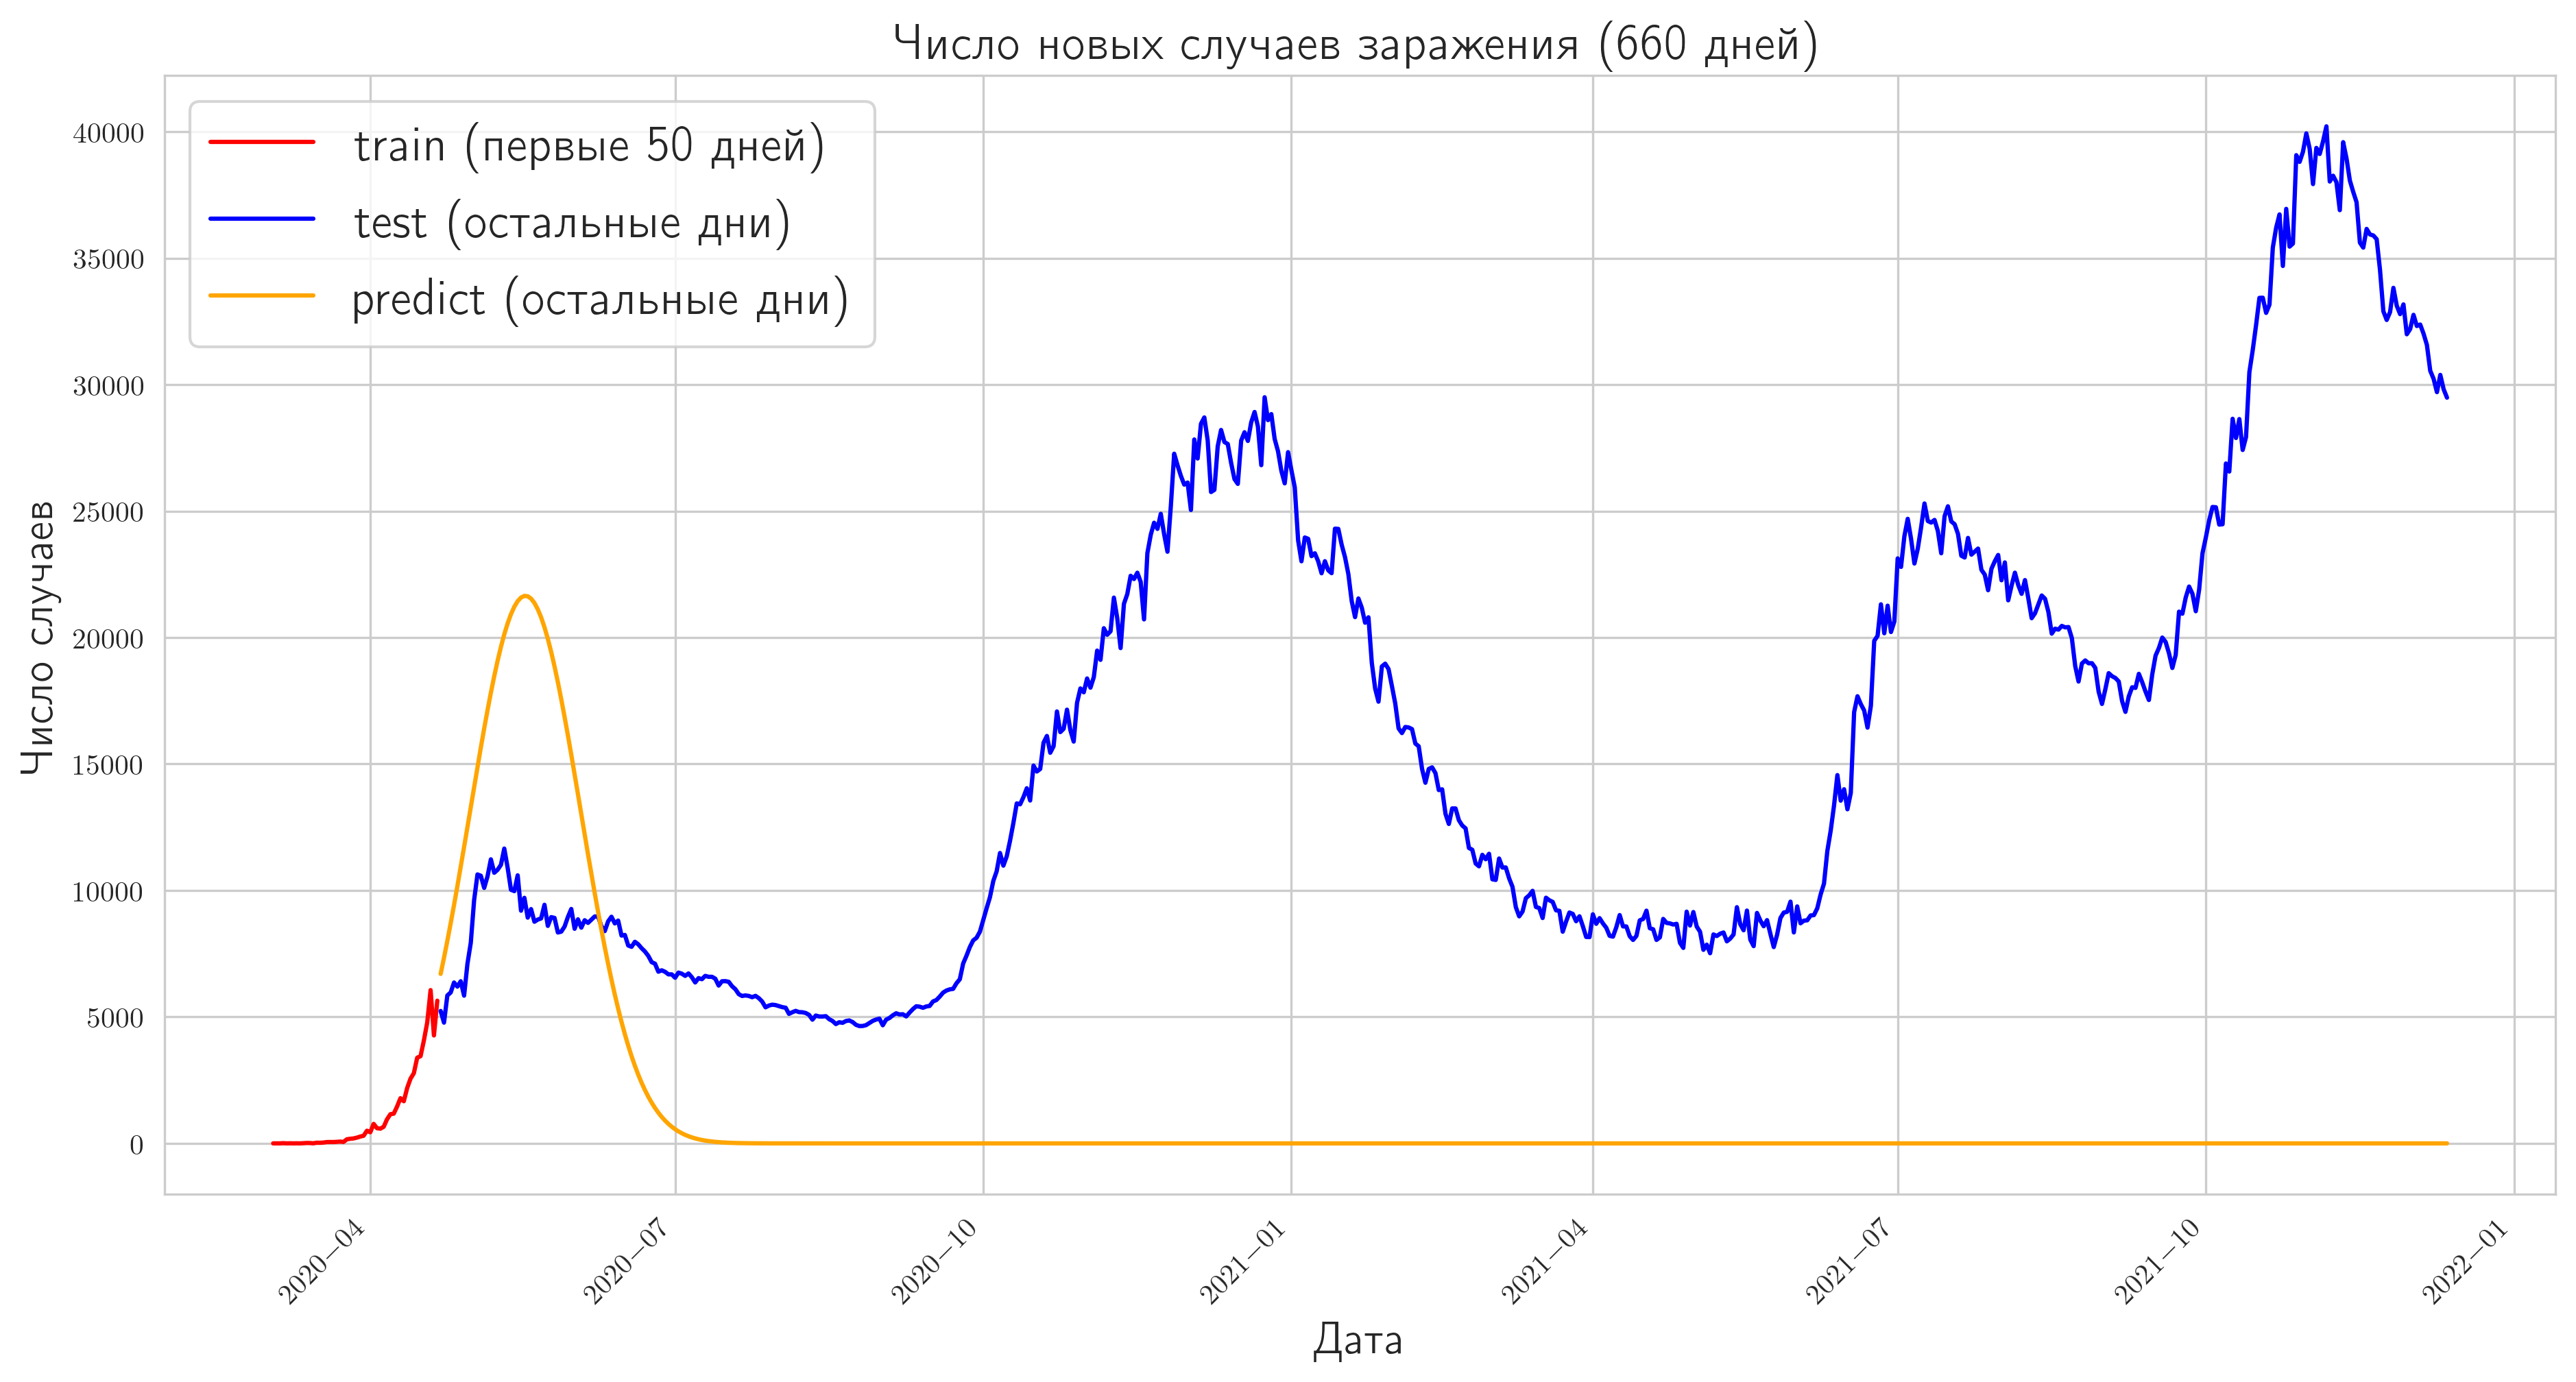

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
fig.autofmt_xdate(rotation=45)

ax.margins(0.05)
ax.plot(train.date, train['new_cases'], label="train (первые 50 дней)", color='r')
ax.plot(test.date[:600], test['new_cases'][:600], label="test  (остальные дни)", color='b')
ax.plot(test.date[:600], np.exp(lr_model2.predict(test[['day', 'day2']][:600])), label="predict (остальные дни)", color='orange')
ax.set_title("Число новых случаев заражения (660 дней)", fontsize=legend_fontsize)
ax.set_xlabel("Дата", fontsize=axis_fontsize)
ax.set_ylabel("Число случаев", fontsize=axis_fontsize)
ax.legend(loc="upper left", fontsize=legend_fontsize)

plt.show()

In [23]:
sigma_noise = np.std(lr_model2.predict(train[['day', 'day2']]) - np.log(train['new_cases']))
sigma_noise

0.4891695424595195

In [24]:
N = 1000
X = np.linspace(0, 0.4, N)
Y = np.linspace(0, 0.4, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((0, 0.4))
    plt.ylim((0, 0.4))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    
cur_mu = np.array([0, 0, 0])
cur_sigma = np.array([[50, 0, 0], [0, 50, 0], [0, 0, 50]])

def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x, x**2]])
    sigma_n = np.linalg.inv(np.float64(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix)))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

for i in range(train.shape[0]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma,
                                        train.iloc[i]['day'], np.log(train.iloc[i]['new_cases']),
                                        sigma_noise=sigma_noise)

In [25]:
print("Апостериорное распределение параметров этой модели:\n")
print("mu = {}\n".format(cur_mu))
print("sigma = {}".format(cur_sigma))

Апостериорное распределение параметров этой модели:

mu = [-0.67339328  0.27923046 -0.00182893]

sigma = [[ 4.66658995e-02 -3.69569846e-03  6.09850687e-05]
 [-3.69569846e-03  3.81916385e-04 -7.03880677e-06]
 [ 6.09850687e-05 -7.03880677e-06  1.38029897e-07]]


## 3️⃣c)
Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии ($90$-й процентиль в выборке числа случаев)? В оптимистичном сценарии ($10$-й процентиль)?

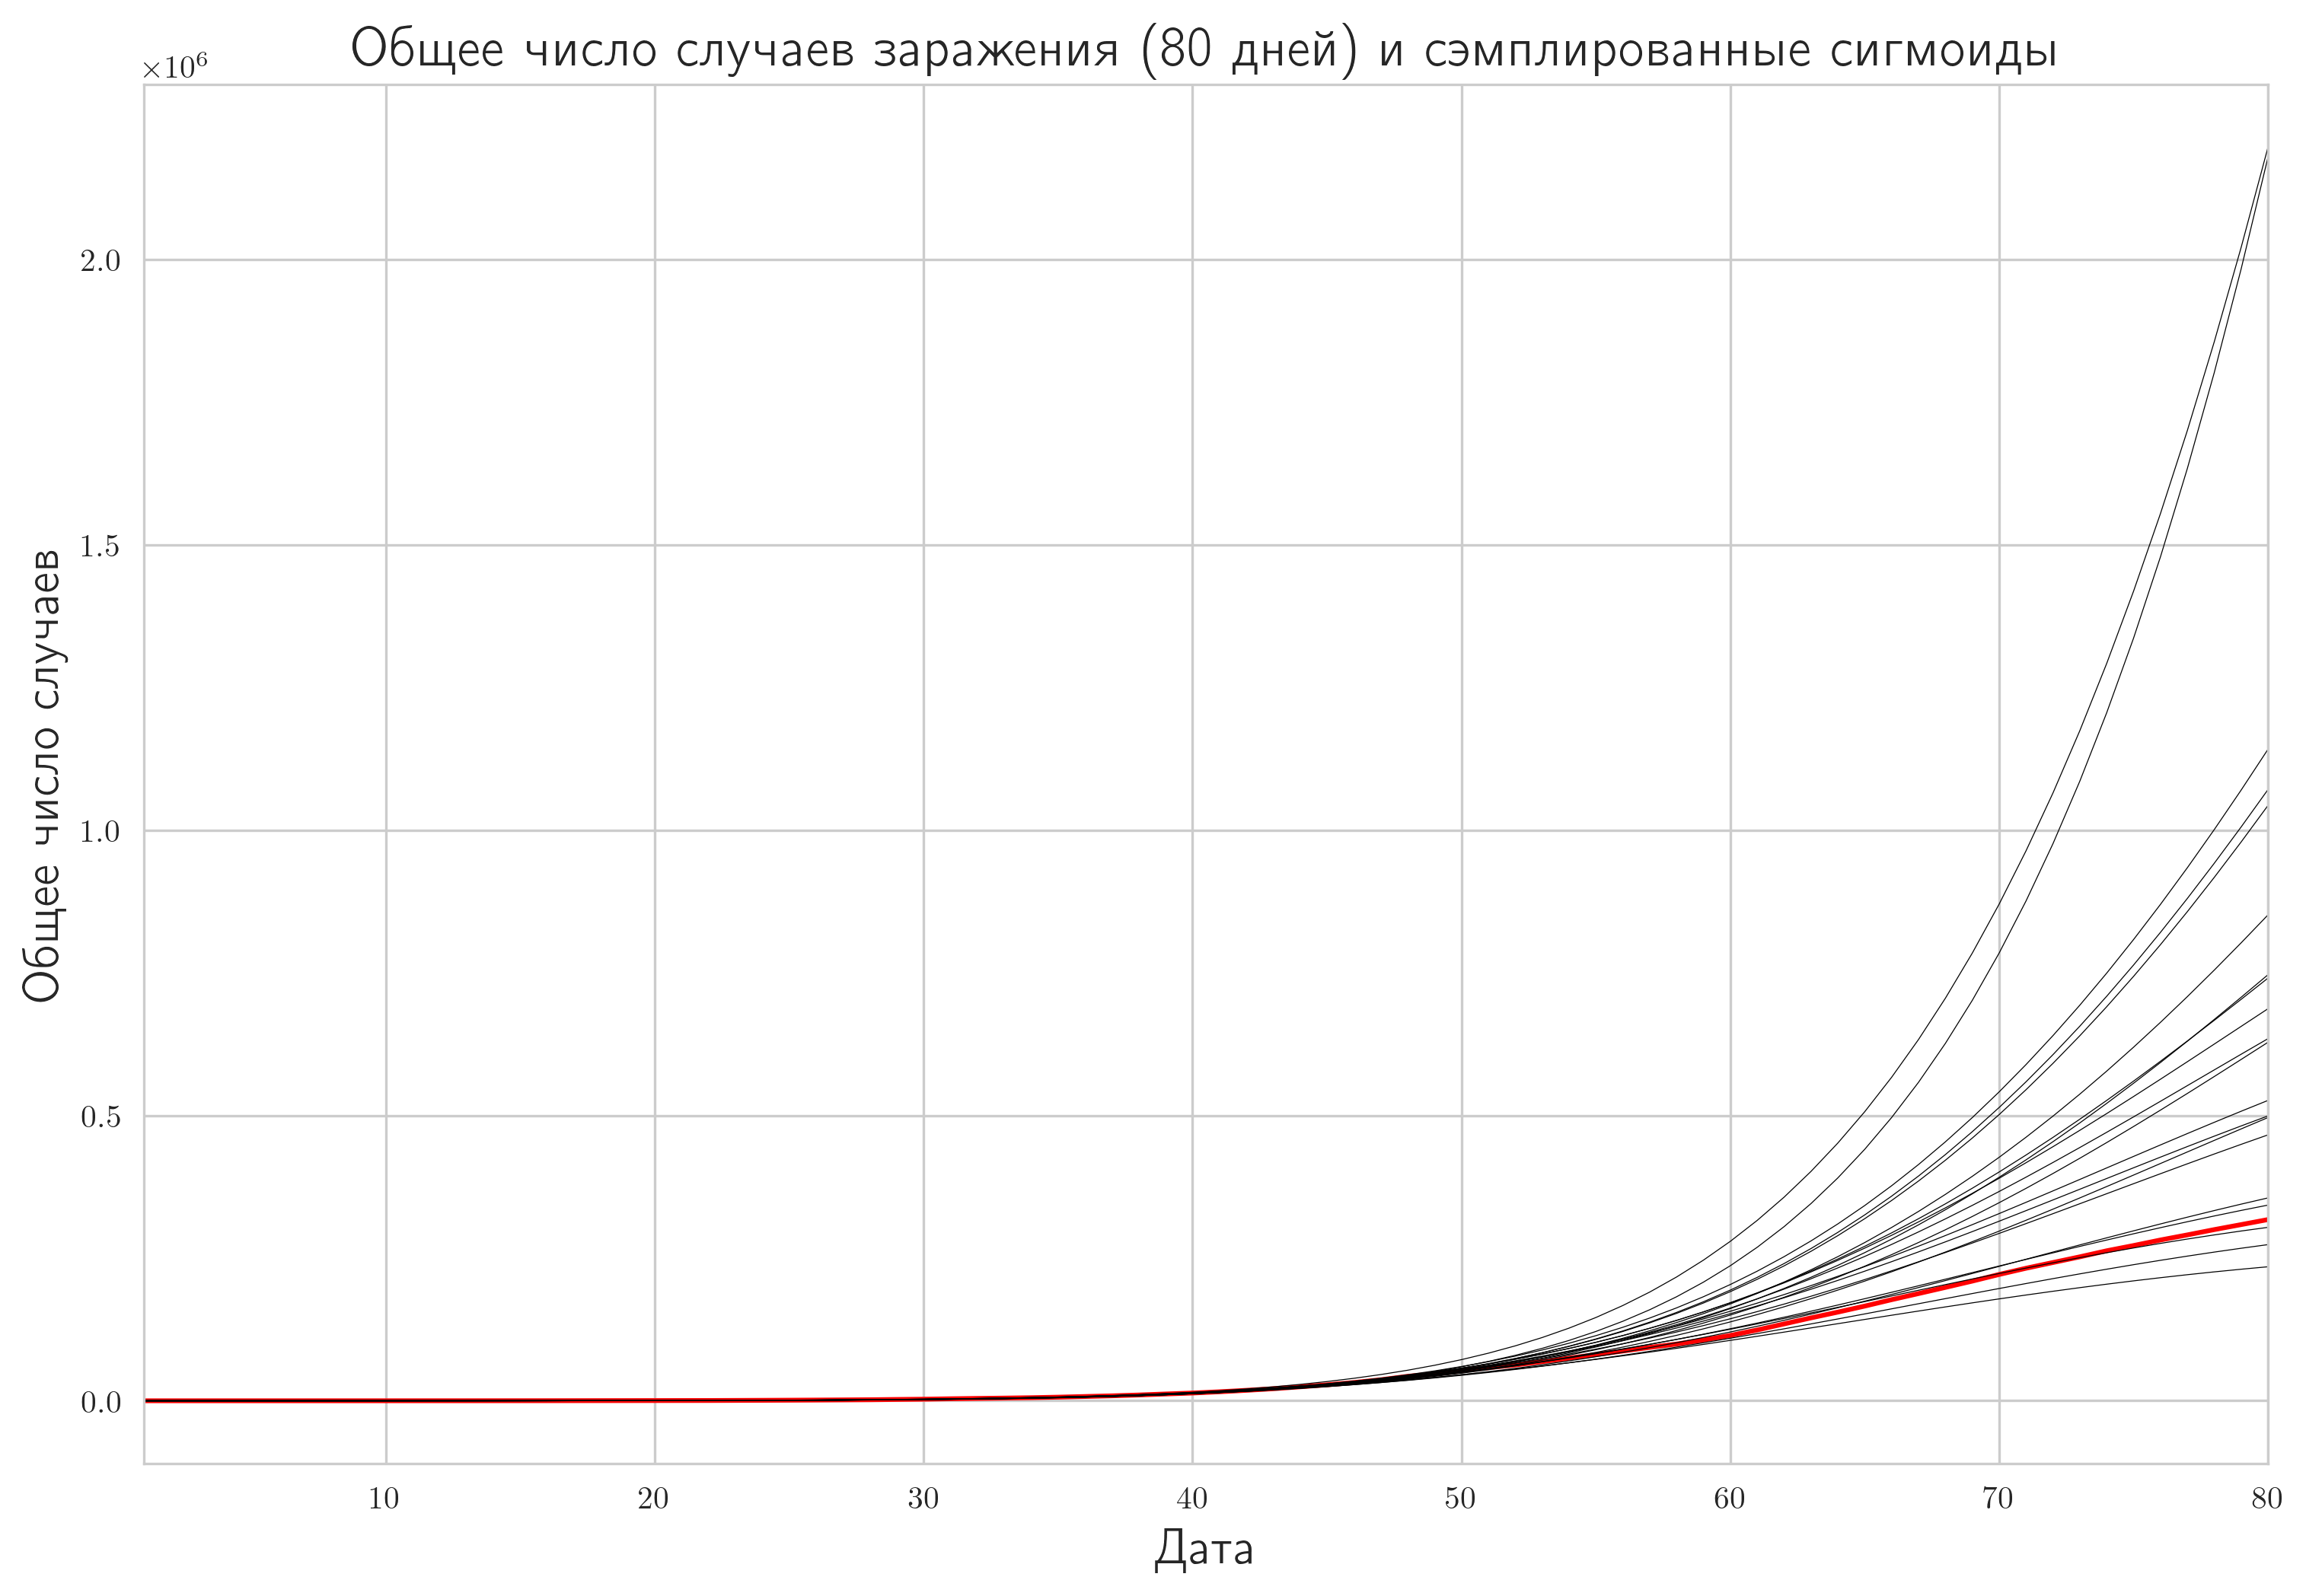

In [26]:
def myplot_sample_lines(mu, sigma, xs, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.cumsum(np.exp(w[0] + w[1] * xs + w[2] * (xs**2))), 'k-', lw=.3)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
        
        
x_first_80 = df['day'].values.reshape(-1, 1)[:80]
y_first_80 = df['total_cases'].values.reshape(-1, 1)[:80]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.set_xlim((x_first_80[0], x_first_80[-1]))
ax.plot(x_first_80, y_first_80, color='r')
ax.set_xlabel("Дата", fontsize=axis_fontsize)
ax.set_ylabel("Общее число случаев", fontsize=axis_fontsize)
ax.set_title("Общее число случаев заражения (80 дней) и сэмплированные сигмоиды", fontsize=legend_fontsize)
myplot_sample_lines(cur_mu, cur_sigma, x_first_80)

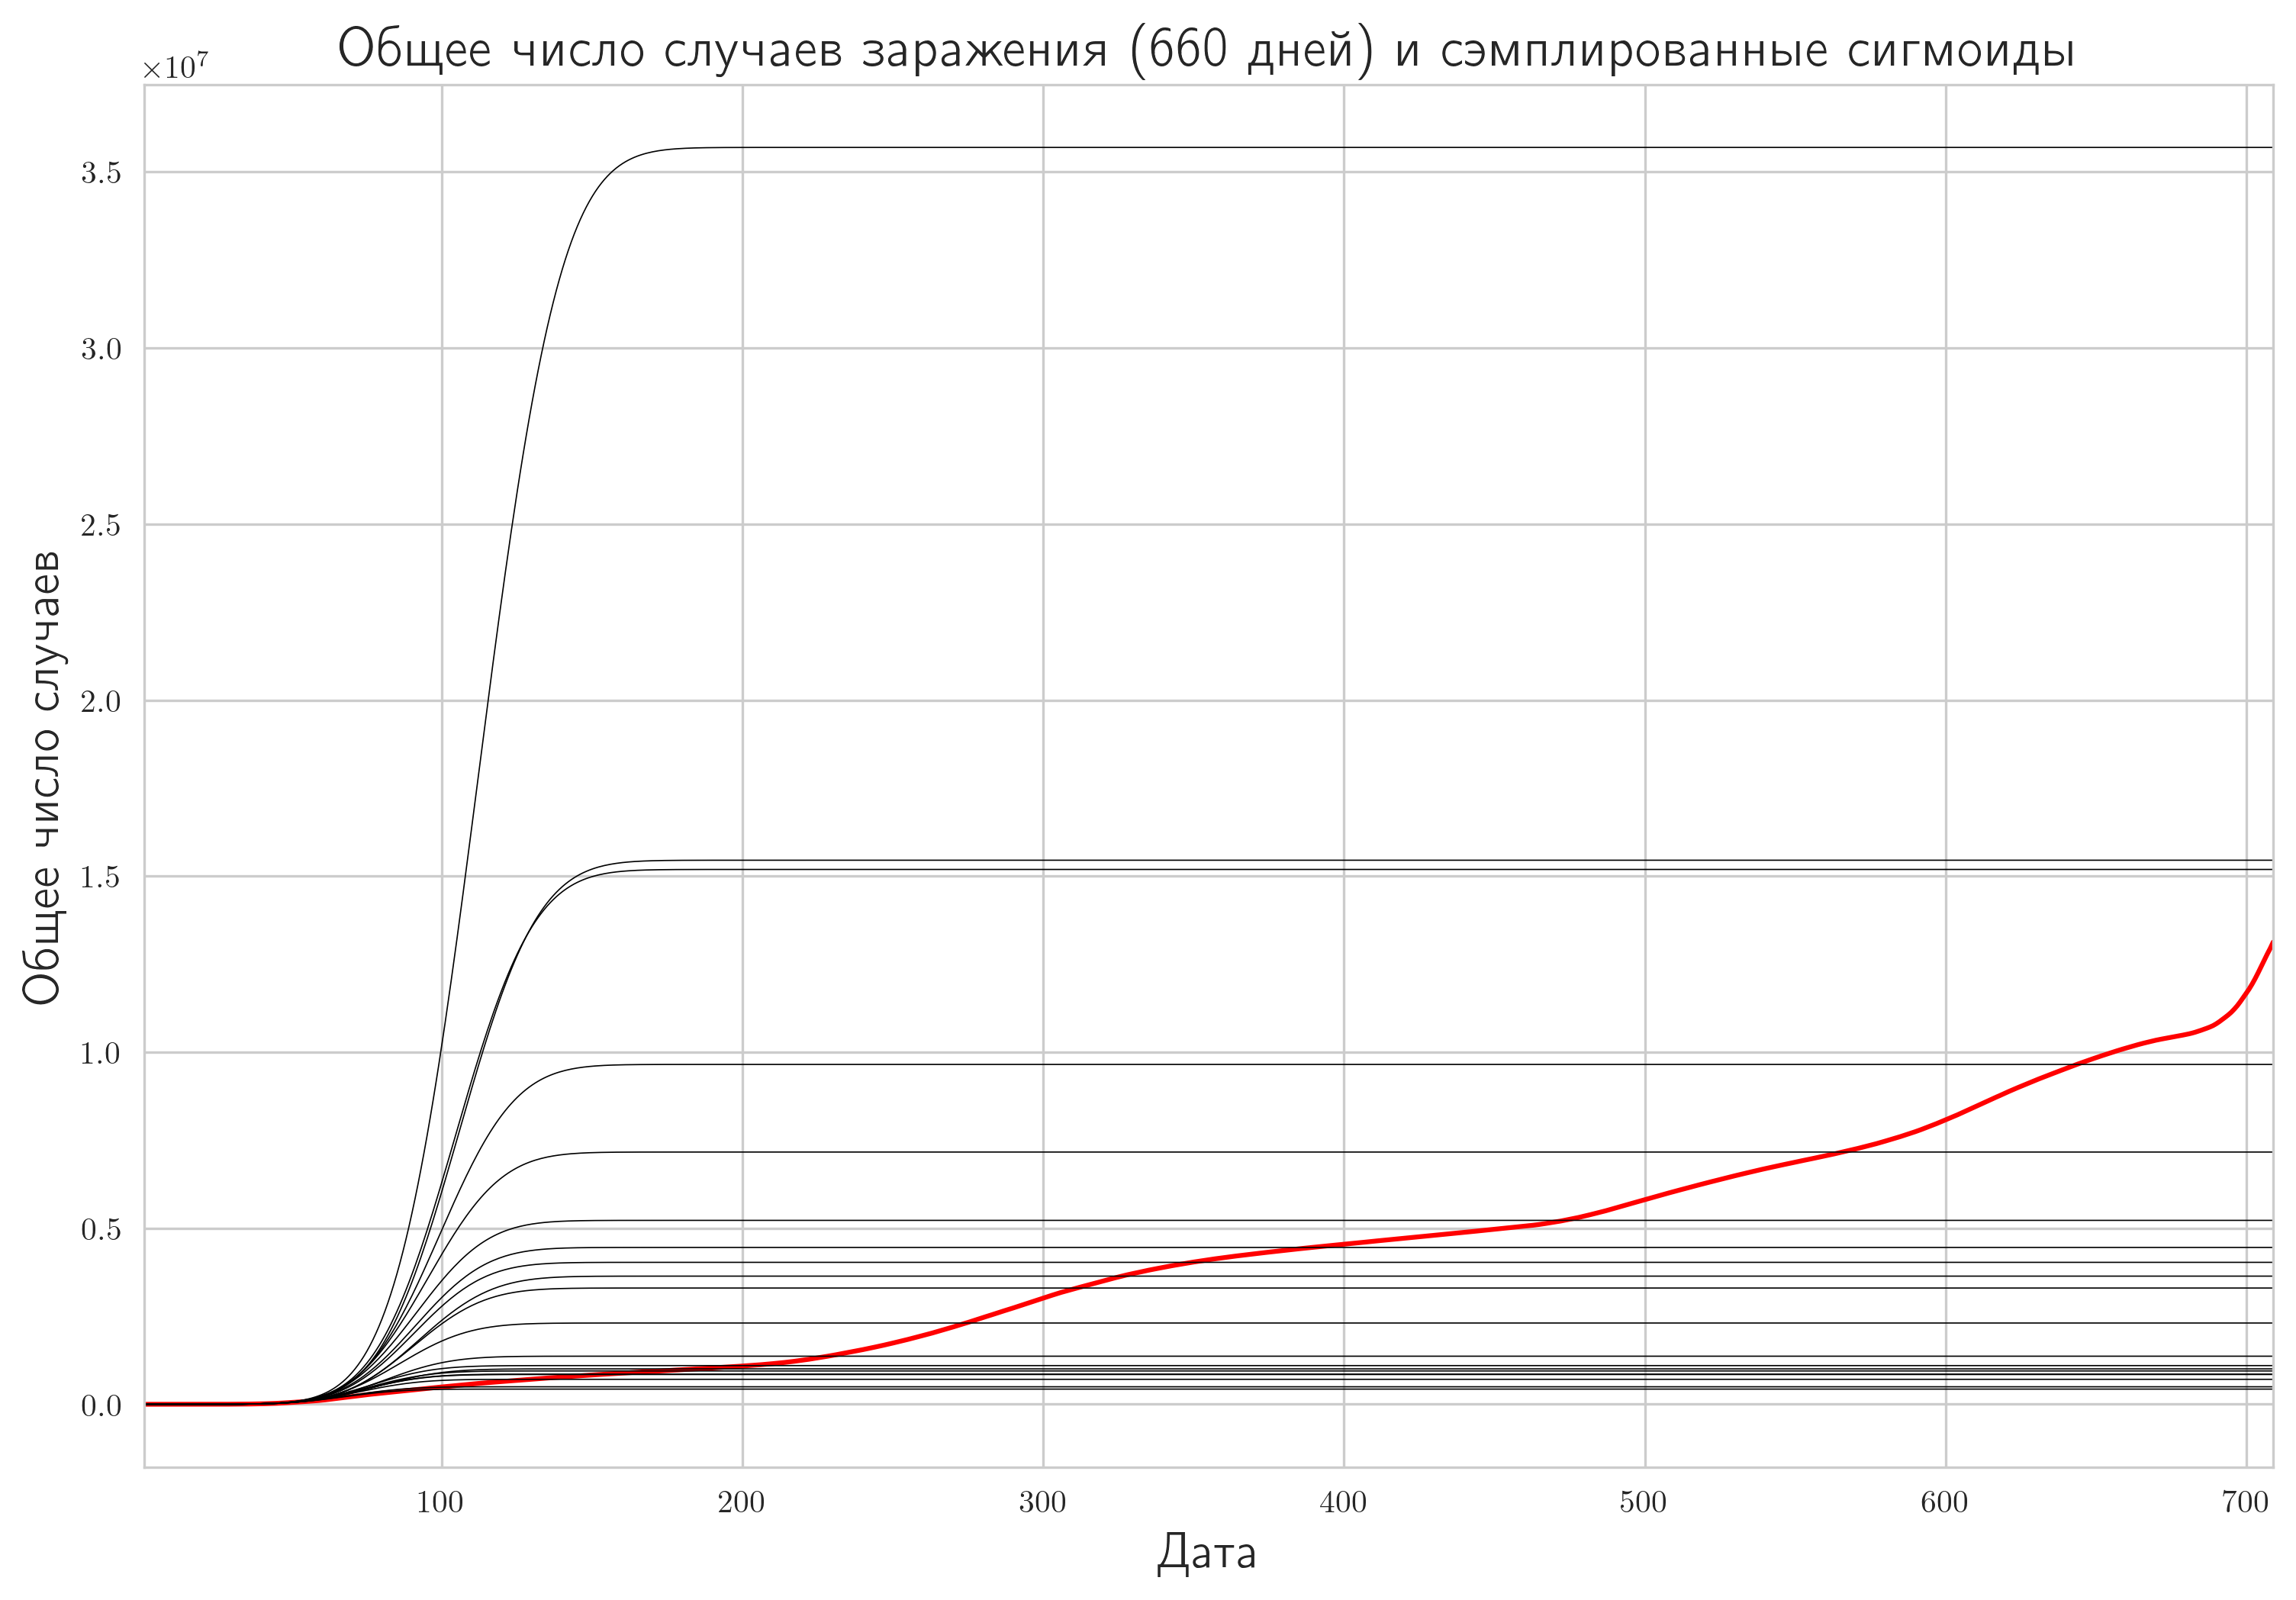

In [27]:
def myplot_sample_lines(mu, sigma, xs, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.cumsum(np.exp(w[0] + w[1] * xs + w[2] * (xs**2))), 'k-', lw=.4)
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
        
        
x_all = df['day'].values.reshape(-1, 1)
y_all = df['total_cases'].values.reshape(-1, 1)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.set_xlim((x_all[0], x_all[-1]))
# ax.set_ylim((0, 10**7))
ax.plot(x_all, y_all, color='r')
ax.set_xlabel("Дата", fontsize=axis_fontsize)
ax.set_ylabel("Общее число случаев", fontsize=axis_fontsize)
ax.set_title("Общее число случаев заражения (660 дней) и сэмплированные сигмоиды", fontsize=legend_fontsize)
myplot_sample_lines(cur_mu, cur_sigma, x_all)

In [28]:
sample_exponents2 = []
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 1000)
for w in my_w:
    sample_exponents2.append(np.cumsum(np.exp(w[0] + w[1] * x_all + w[2] * (x_all**2))))
sample_exponents2 = np.array(sample_exponents2)

print("Предсказание случаев коронавируса в России к  1  мая 2020 года: {}".format(int(sample_exponents2.mean(axis=0)[days_to_may])))
print("Предсказание случаев коронавируса в России к  1  июня 2020 года: {}".format(int(sample_exponents2.mean(axis=0)[days_to_june])))
print("Предсказание случаев коронавируса в России к  1  сентября 2020 года: {}".format(int(sample_exponents2.mean(axis=0)[day_to_september])))

Предсказание случаев коронавируса в России к  1  мая 2020 года: 156518
Предсказание случаев коронавируса в России к  1  июня 2020 года: 1091013
Предсказание случаев коронавируса в России к  1  сентября 2020 года: 3531740


<font color='darkviolet'><i> 
✏️ Для тех же самых дат, которые относительно близки к стартовой дате предсказания получились намного лучше, чем для предыдущей модели.
</i></font>

In [29]:
print("Предсказание случаев коронавируса в России к последнему дню в датасете: {}".format(int(sample_exponents2.mean(axis=0)[-1])))

Предсказание случаев коронавируса в России к последнему дню в датасете: 3545008


<font color='darkviolet'><i> 
✏️ Однако далекое будущее модель все равно предсказывает плохо, в России почти на порядок меньше жителей, чем модель предсказала случаев заражения.
</i></font>

In [30]:
sample_exponents2 = []
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 200)
for w in my_w:
    sample_exponents2.append(np.cumsum(np.exp(w[0] + w[1] * x_all + w[2] * (x_all**2))))
sample_exponents2 = np.array(sample_exponents2)

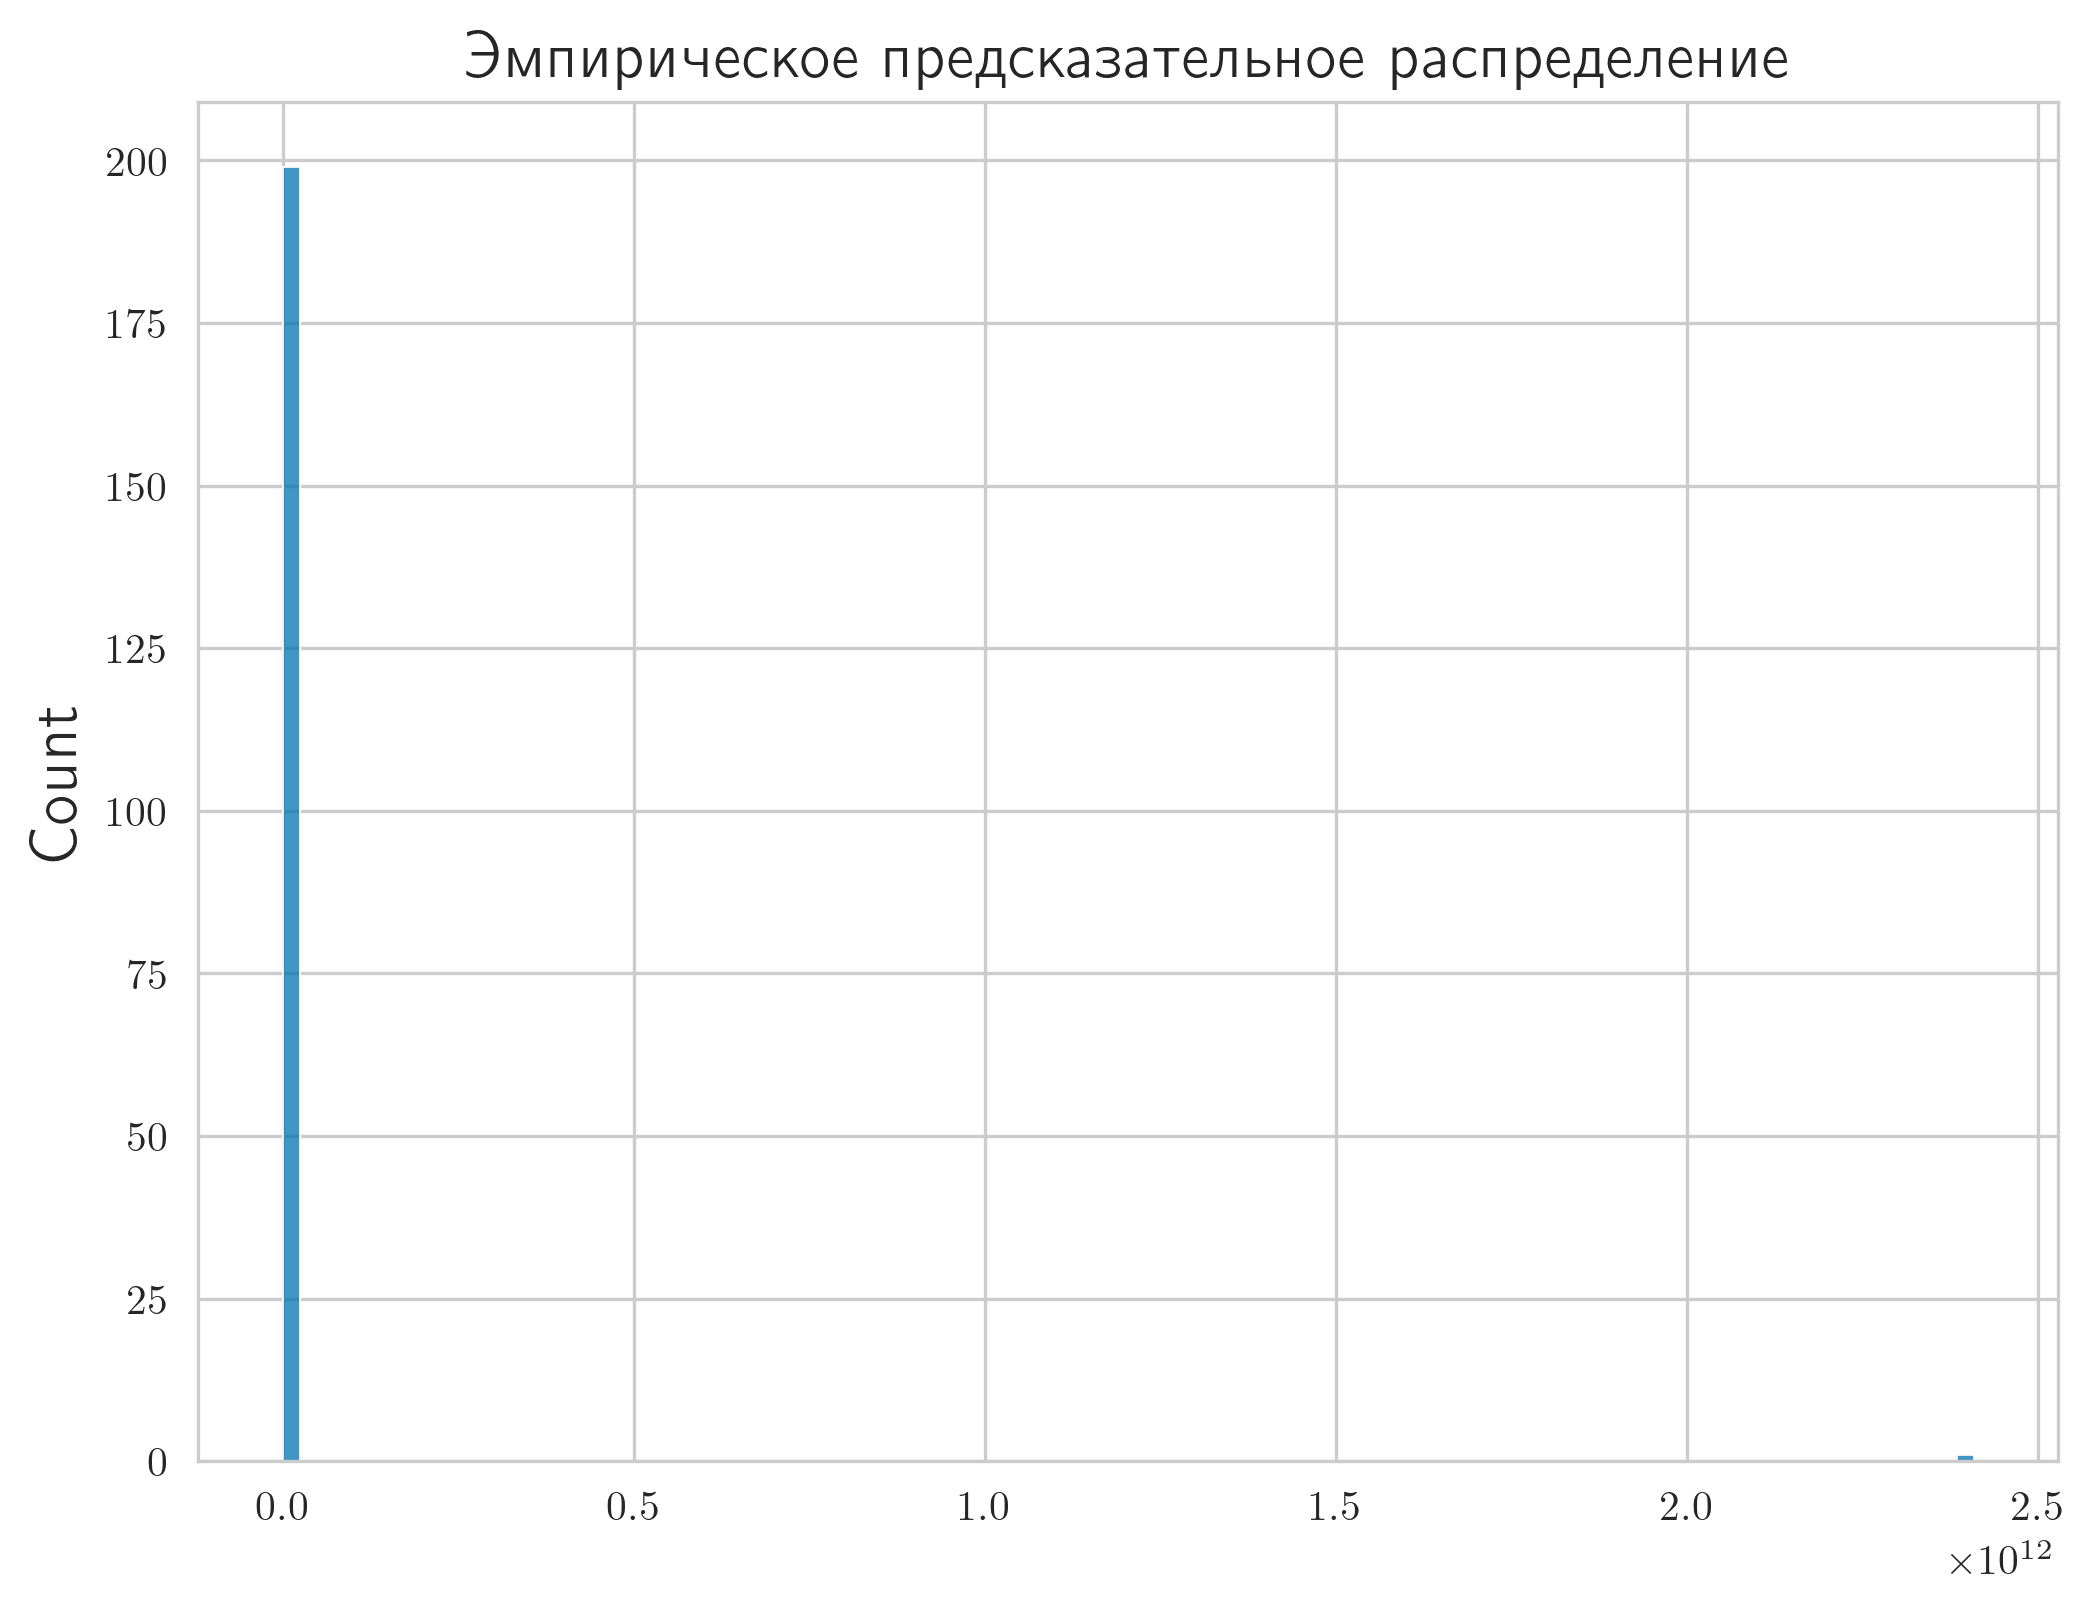

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(sample_exponents2[:, 400], bins=100)
ax.set_title("Эмпирическое предсказательное распределение")
plt.show()

In [32]:
sample_exponents2 = []
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 10000)
for w in my_w:
    sample_exponents2.append(np.cumsum(np.exp(w[0] + w[1] * x_all + w[2] * (x_all**2))))
sample_exponents2 = np.array(sample_exponents2)

In [33]:
print("Прогноз в пессимистичном сценарии: {}".format(int(np.percentile(sample_exponents2[:, 500], 90))))

Прогноз в пессимистичном сценарии: 5239744


In [34]:
print("Прогноз в оптимистичном сценарии: {}".format(int(np.percentile(sample_exponents2, 10))))

Прогноз в оптимистичном сценарии: 192669


## 5️⃣
\[*Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете*\]  
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

<font color='darkviolet'><i> 
✏️ Первая модель абсолютно нереалистичная. Вторая модель неплохо предсказывает на первые несколько дней прогнозов, а затем также демонстрирует, что может быть все что угодно. Не хватает информации для того, чтобы принять точное решение, поскольку сэмплированные сигмоиды сильно различаются. Также мы уже знаем, что было $3$ волны короновируса, и что даже сигмоидальной модели сложно соответсвать реальной ситуации.
</i></font>